In [1]:
import os
import string
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def expand_pos_tag(tag):
    tag_definitions = {
        "NN": "Noun, singular or mass",
        "NNS": "Noun, plural",
        "NNP": "Proper noun, singular",
        "NNPS": "Proper noun, plural",
        "VB": "Verb, base form",
        "VBD": "Verb, past tense",
        "VBG": "Verb, gerund or present participle",
        "VBN": "Verb, past participle",
        "VBP": "Verb, non-3rd person singular present",
        "VBZ": "Verb, 3rd person singular present",
        "JJ": "Adjective",
        "JJR": "Adjective, comparative",
        "JJS": "Adjective, superlative",
        "RB": "Adverb",
        "RBR": "Adverb, comparative",
        "RBS": "Adverb, superlative",
        "PRP": "Personal pronoun",
        "PRP$": "Possessive pronoun",
        "IN": "Preposition or subordinating conjunction",
        "DT": "Determiner",
        "CC": "Coordinating conjunction",
        "CD": "Cardinal number",
        "MD": "Modal",
        "EX": "Existential there",
        "FW": "Foreign word",
        "POS": "Possessive ending",
        "RP": "Particle",
        "TO": "to",
        "WDT": "Wh-determiner",
        "WP": "Wh-pronoun",
        "WP$": "Possessive wh-pronoun",
        "WRB": "Wh-adverb"
    }
    return tag_definitions.get(tag, "Other")

from nltk.corpus import stopwords

def process_text_file(file_path):
    word_freq = Counter()
    all_tags = Counter()
    stop_words = set(stopwords.words('english'))  # Set of English stopwords

    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read().lower()
        # Remove punctuation, apostrophes, and quotations
        text = text.translate(str.maketrans('', '', string.punctuation + "‘’“”"))
        tokens = word_tokenize(text)
        
        # Filter out stopwords
        filtered_tokens = [word for word in tokens if word not in stop_words]
        word_freq.update(filtered_tokens)

        # POS Tagging and expansion
        tagged = pos_tag(filtered_tokens)
        all_tags.update([expand_pos_tag(tag) for _, tag in tagged])

    return word_freq, all_tags

def print_common_elements(counter, title, filename=""):
    full_title = f"{title} {filename}" if filename else title
    print(f"{full_title}:")
    for element, count in counter.most_common(10):
        print(f"{element}: {count}")
    print("\n")

directory_path = r"C:\Users\hosan\Downloads\Fantasy_TXTS"
directory_word_freq = Counter()
directory_all_tags = Counter()

for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)
        word_freq, all_tags = process_text_file(file_path)

        # Print most common words and POS tags for each file
        print(f"File: {filename}")
        print_common_elements(word_freq, "Most common words")
        print_common_elements(all_tags, "Most common Part Of Speech tags for", filename)

        # Aggregate data for overall directory analysis
        directory_word_freq.update(word_freq)
        directory_all_tags.update(all_tags)

# Print most common words and POS tags for the entire directory
print("Overall for Directory:")
print_common_elements(directory_word_freq, "Most common words in directory")
print_common_elements(directory_all_tags, "Most common Part Of Speech tags for Fantasy")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hosan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hosan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


File: A Connecticut Yankee in King Arthur's Court.txt
Most common words:
would: 540
one: 433
said: 401
could: 379
sir: 355
time: 308
king: 301
well: 262
good: 239
man: 235


Most common Part Of Speech tags for A Connecticut Yankee in King Arthur's Court.txt:
Noun, singular or mass: 17326
Adjective: 10103
Noun, plural: 5074
Verb, past tense: 4494
Adverb: 4094
Verb, non-3rd person singular present: 2243
Verb, base form: 2222
Verb, gerund or present participle: 1928
Verb, past participle: 1920
Modal: 1380


File: Phatastes A Faerie Romance.txt
Most common words:
one: 285
could: 266
like: 216
little: 153
said: 149
great: 146
saw: 146
seemed: 142
yet: 138
would: 132


Most common Part Of Speech tags for Phatastes A Faerie Romance.txt:
Noun, singular or mass: 9489
Adjective: 6168
Verb, past tense: 3281
Noun, plural: 2733
Adverb: 2696
Verb, gerund or present participle: 1415
Verb, past participle: 1237
Verb, non-3rd person singular present: 1028
Preposition or subordinating conjunction: 1015


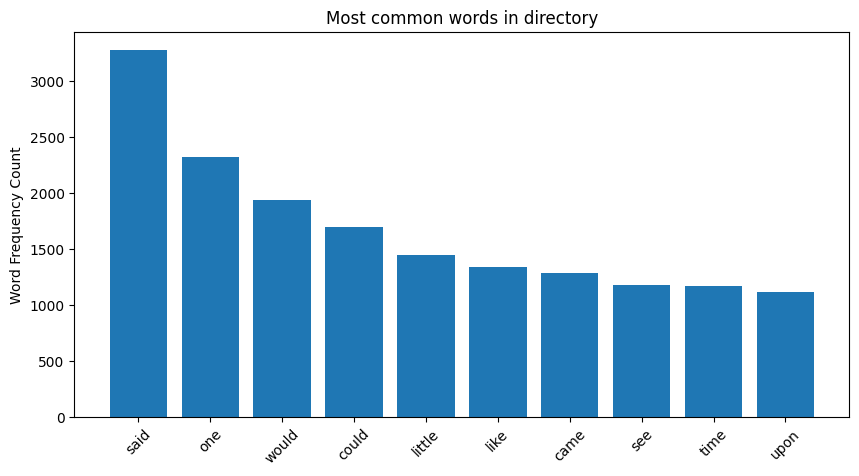

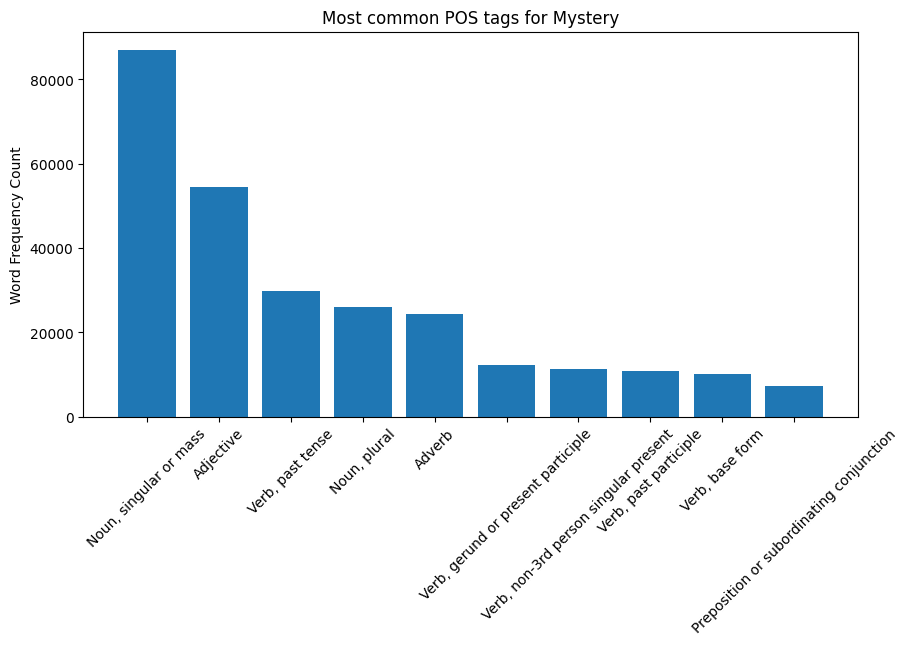

In [2]:
import matplotlib.pyplot as plt

# Function to plot the most common elements
def plot_common_elements(counter, title):
    elements, counts = zip(*counter.most_common(10))
    plt.figure(figsize=(10, 5))
    plt.bar(elements, counts)
    plt.title(title)
    plt.ylabel("Word Frequency Count")
    plt.xticks(rotation=45)
    plt.show()

# Visualize the overall most common words and POS tags
plot_common_elements(directory_word_freq, "Most common words in directory")
plot_common_elements(directory_all_tags, "Most common POS tags for Mystery")

In [3]:
import plotly.express as px
import os

def plot_pie_chart(counter, title, filename):
    # Prepare data for the pie chart
    labels, values = zip(*counter.most_common(10))

    # Create the pie chart
    fig = px.pie(values=values, names=labels, title=f"{title} - {filename}")
    fig.update_traces(textinfo='percent+label', hoverinfo='label+value')

    # Show the plot
    fig.show()

directory_path = r'C:\Users\hosan\Downloads\Fantasy_TXTS'

for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)
        word_freq, _ = process_text_file(file_path)

        # Plot pie chart for each file
        plot_pie_chart(word_freq, "Word Distribution", filename)

In [4]:
import spacy
import os

# Load the SpaCy model
nlp = spacy.load('en_core_web_sm')

def analyze_sentence_structure(directory):
    sentence_count = 0
    word_count = 0
    pos_count = {}

    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
                text = file.read()
                doc = nlp(text)

                for sent in doc.sents:
                    sentence_count += 1
                    for token in sent:
                        word_count += 1
                        pos_count[token.pos_] = pos_count.get(token.pos_, 0) + 1

    return sentence_count, word_count, pos_count

directory_path = r"C:\Users\hosan\Downloads\Fantasy_TXTS"
sentence_count, word_count, pos_count = analyze_sentence_structure(directory_path)

print(f"Total number of sentences: {sentence_count}")
print(f"Total number of words: {word_count}")
print("Part Of Speech counts:", pos_count)

Total number of sentences: 30920
Total number of words: 811054
Part Of Speech counts: {'PROPN': 21988, 'NOUN': 107310, 'ADP': 71062, 'PART': 16788, 'SPACE': 58443, 'PUNCT': 117578, 'DET': 64728, 'PRON': 88481, 'AUX': 38446, 'VERB': 88391, 'ADJ': 40009, 'NUM': 4686, 'CCONJ': 33347, 'SCONJ': 18349, 'ADV': 39478, 'X': 121, 'INTJ': 1840, 'SYM': 9}


Total number of sentences: 30920
Total number of words: 811054
Part Of Speech counts: {'PROPN': 21988, 'NOUN': 107310, 'ADP': 71062, 'PART': 16788, 'SPACE': 58443, 'PUNCT': 117578, 'DET': 64728, 'PRON': 88481, 'AUX': 38446, 'VERB': 88391, 'ADJ': 40009, 'NUM': 4686, 'CCONJ': 33347, 'SCONJ': 18349, 'ADV': 39478, 'X': 121, 'INTJ': 1840, 'SYM': 9}


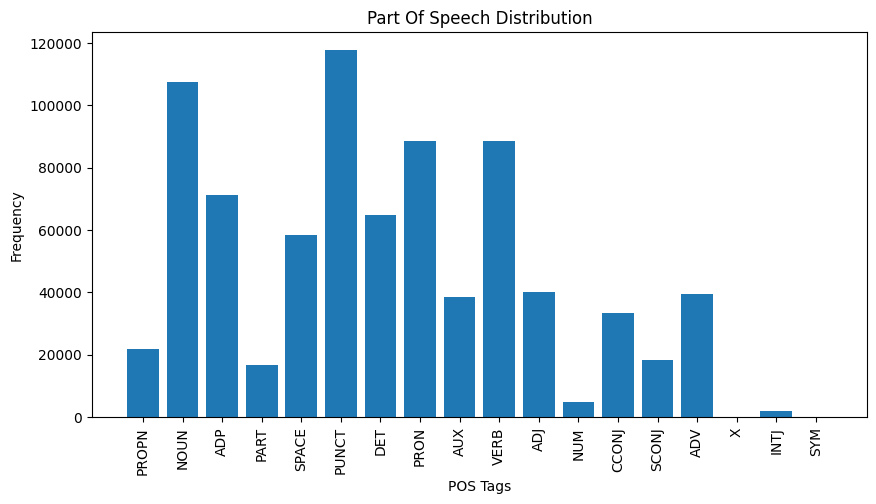

In [5]:
import matplotlib.pyplot as plt
import spacy
import os

# Load the SpaCy model
nlp = spacy.load('en_core_web_sm')

def analyze_sentence_structure(directory):
    sentence_count = 0
    word_count = 0
    pos_count = {}

    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
                text = file.read()
                doc = nlp(text)

                for sent in doc.sents:
                    sentence_count += 1
                    for token in sent:
                        word_count += 1
                        pos_count[token.pos_] = pos_count.get(token.pos_, 0) + 1

    return sentence_count, word_count, pos_count

def plot_pos_distribution(pos_count):
    labels, values = zip(*pos_count.items())
    plt.figure(figsize=(10, 5))
    plt.bar(labels, values)
    plt.title('Part Of Speech Distribution')
    plt.xlabel('POS Tags')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # Rotate labels for better readability
    plt.show()

directory_path = r"C:\Users\hosan\Downloads\Fantasy_TXTS"
sentence_count, word_count, pos_count = analyze_sentence_structure(directory_path)

print(f"Total number of sentences: {sentence_count}")
print(f"Total number of words: {word_count}")
print("Part Of Speech counts:", pos_count)

# Visualize the POS distribution
plot_pos_distribution(pos_count)

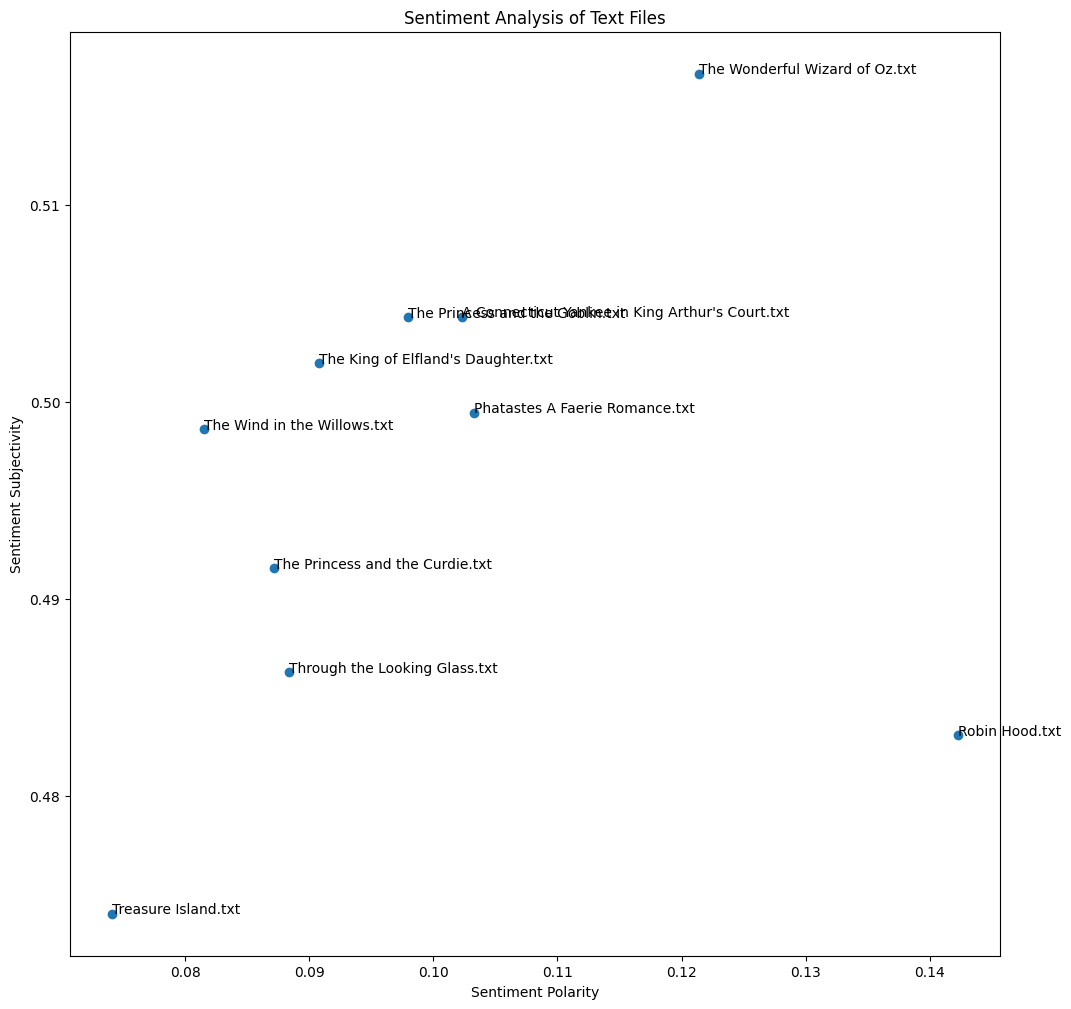

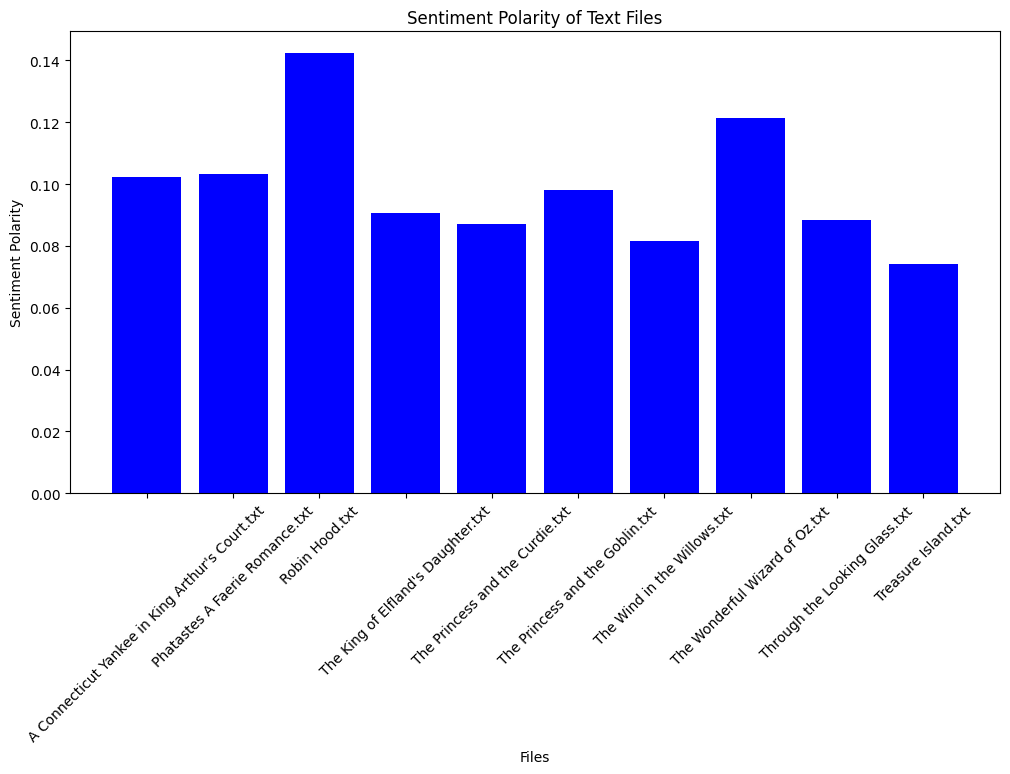

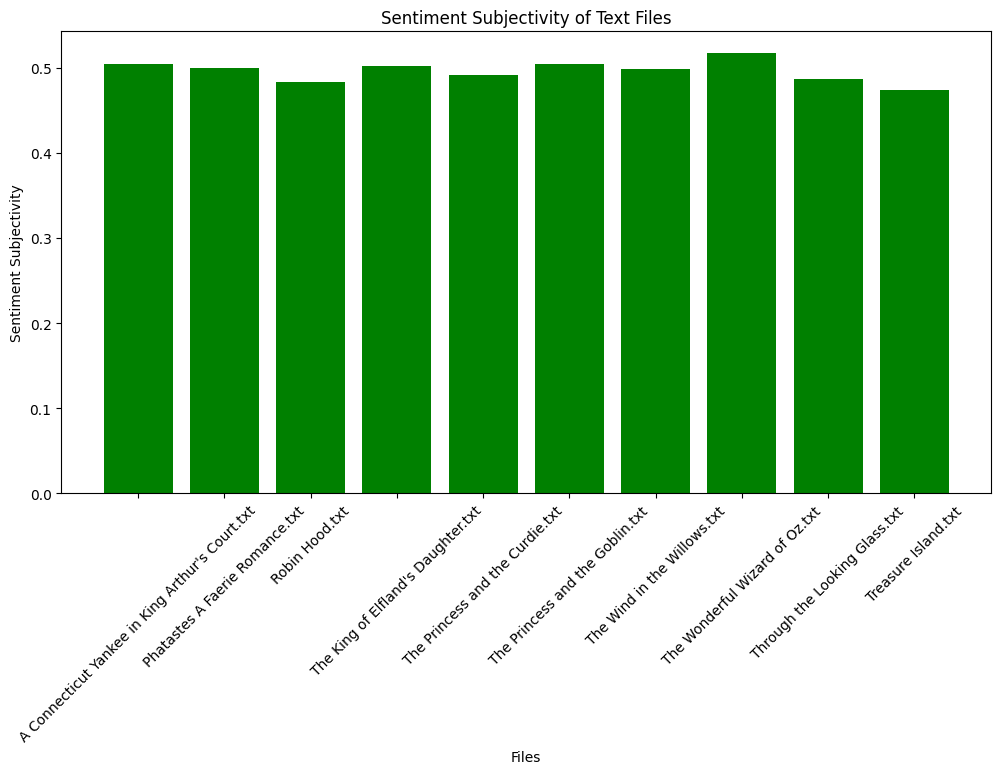

In [6]:
import matplotlib.pyplot as plt
from textblob import TextBlob
import os

def analyze_sentiment(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        blob = TextBlob(text)
        return blob.sentiment

directory_path = r"C:\Users\hosan\Downloads\Fantasy_TXTS"
sentiments = []

for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)
        sentiment = analyze_sentiment(file_path)
        sentiments.append((filename, sentiment.polarity, sentiment.subjectivity))

# Extracting filenames, polarities, and subjectivities
filenames, polarities, subjectivities = zip(*sentiments)

# Scatter Plot
plt.figure(figsize=(12,12))
plt.scatter(polarities, subjectivities)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Sentiment Subjectivity')
plt.title('Sentiment Analysis of Text Files')
for i, filename in enumerate(filenames):
    plt.annotate(filename, (polarities[i], subjectivities[i]))
plt.show()

# Bar Chart for Polarity
plt.figure(figsize=(12, 6))
plt.bar(filenames, polarities, color='blue')
plt.xlabel('Files')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Polarity of Text Files')
plt.xticks(rotation=45)
plt.show()

# Bar Chart for Subjectivity
plt.figure(figsize=(12, 6))
plt.bar(filenames, subjectivities, color='green')
plt.xlabel('Files')
plt.ylabel('Sentiment Subjectivity')
plt.title('Sentiment Subjectivity of Text Files')
plt.xticks(rotation=45)
plt.show()

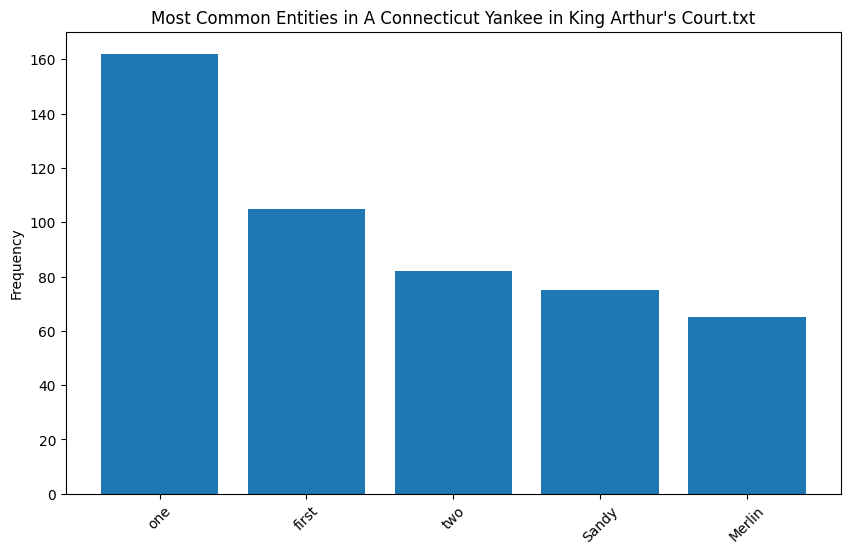

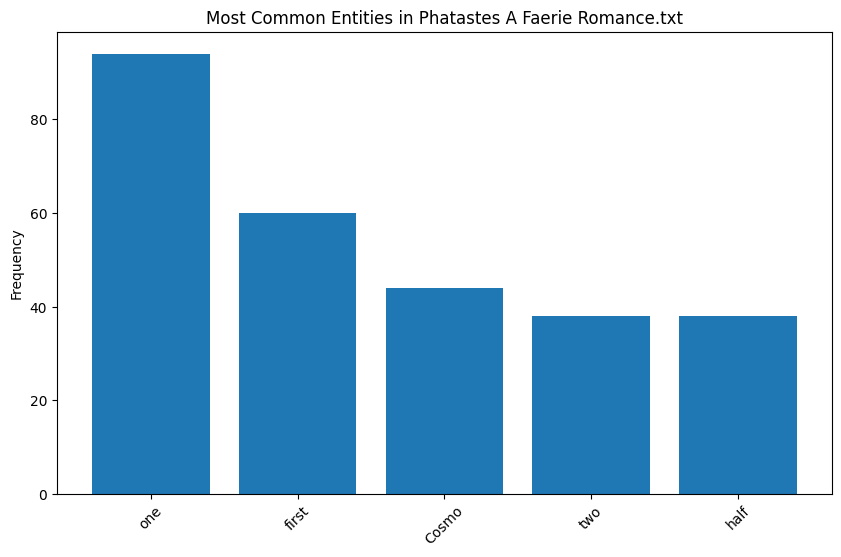

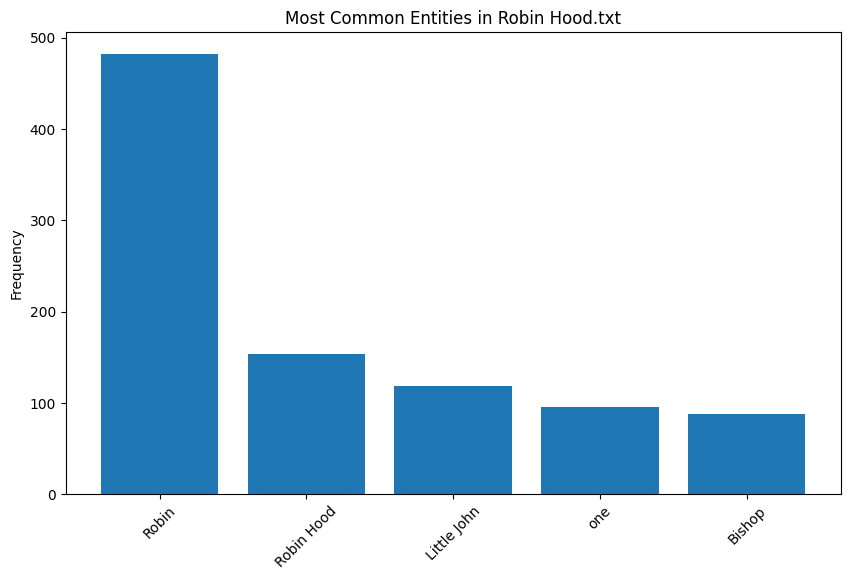

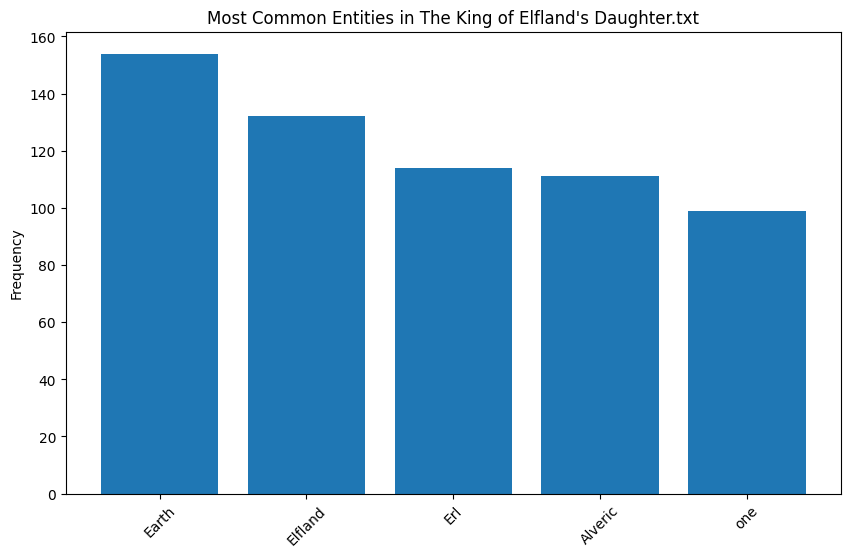

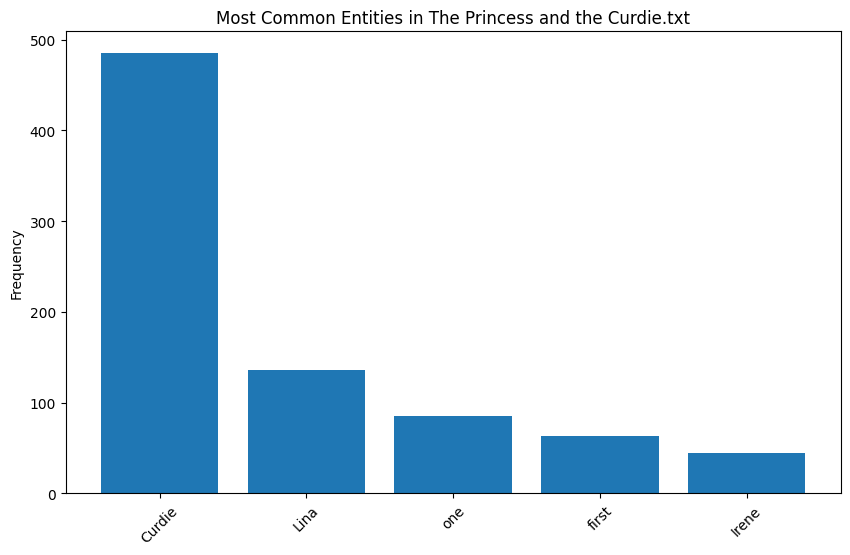

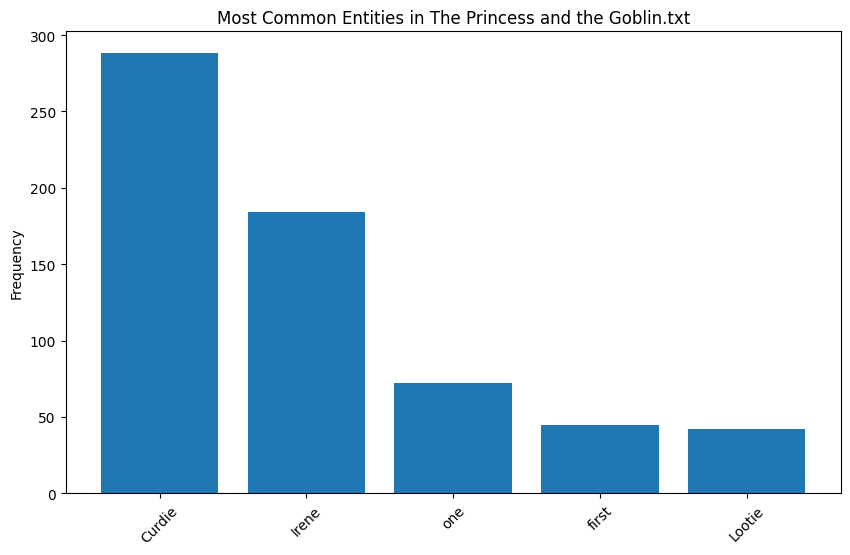

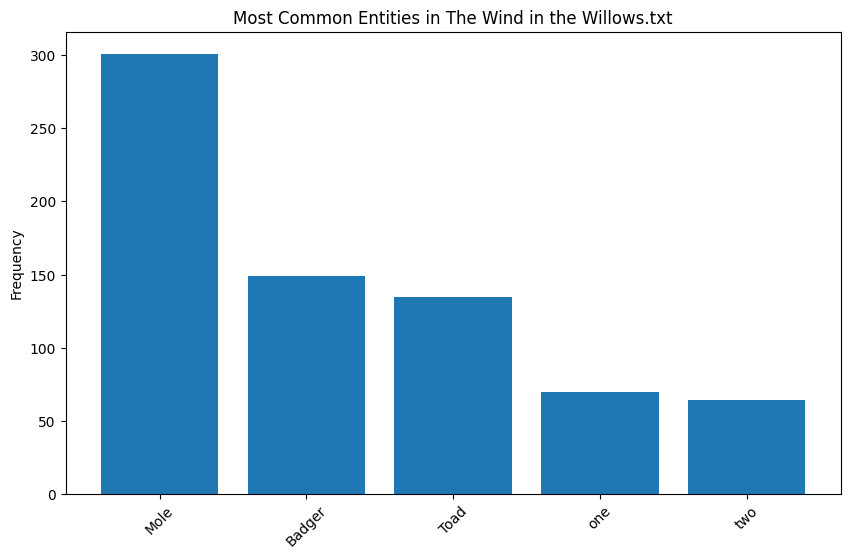

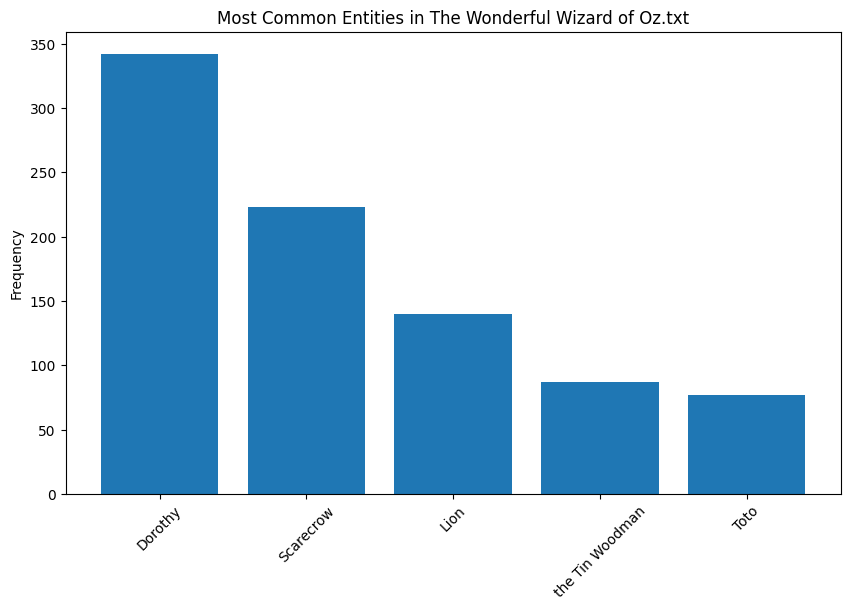

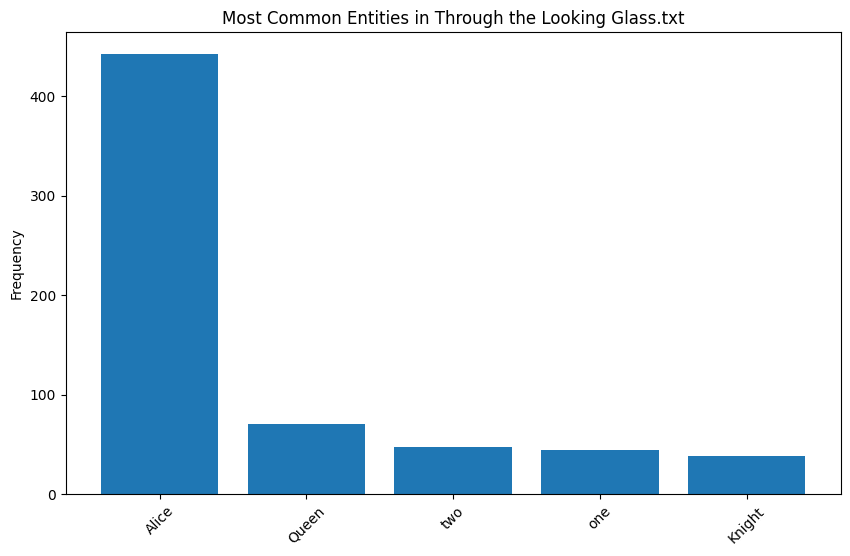

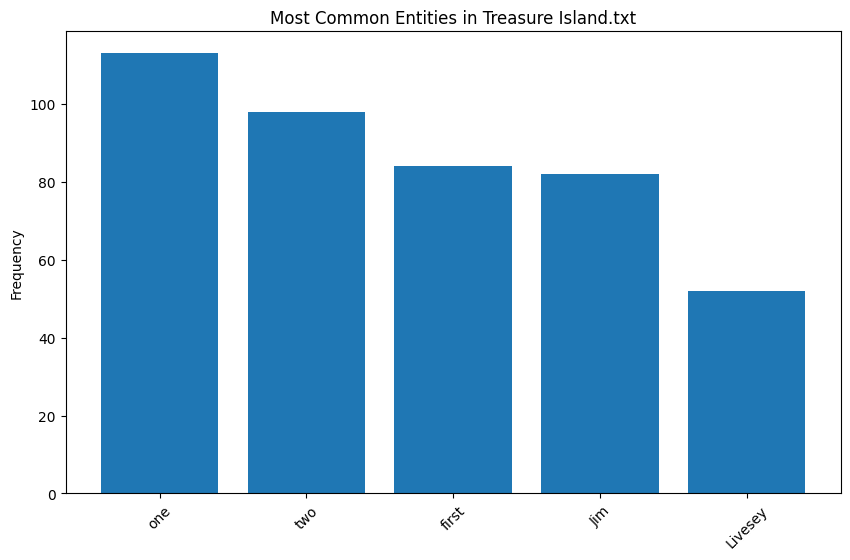

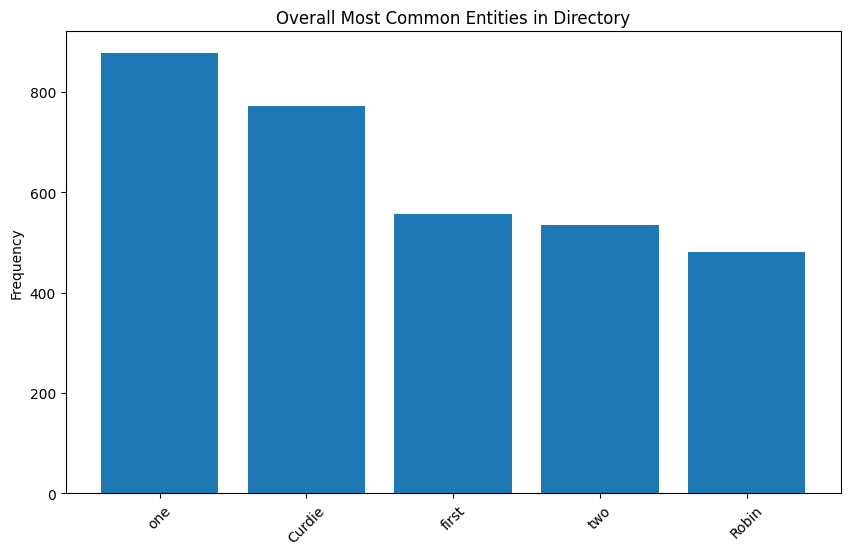

In [7]:
import matplotlib.pyplot as plt
import spacy
import os
from collections import Counter

# Load SpaCy English model
nlp = spacy.load('en_core_web_sm')

def extract_entities(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        doc = nlp(text)
        entities = [ent.text for ent in doc.ents]
    return Counter(entities)

def plot_entity_distribution(entities_counter, title, top_n=5):
    entities, counts = zip(*entities_counter.most_common(top_n))
    plt.figure(figsize=(10, 6))
    plt.bar(entities, counts)
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

directory_path = r"C:\Users\hosan\Downloads\Fantasy_TXTS"
overall_entities = Counter()

for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)
        file_entities = extract_entities(file_path)

        # Plot bar chart for each file
        plot_title = f"Most Common Entities in {filename}"
        plot_entity_distribution(file_entities, plot_title)

        overall_entities.update(file_entities)

# Optionally, plot overall most common entities across all files
plot_entity_distribution(overall_entities, "Overall Most Common Entities in Directory")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hosan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


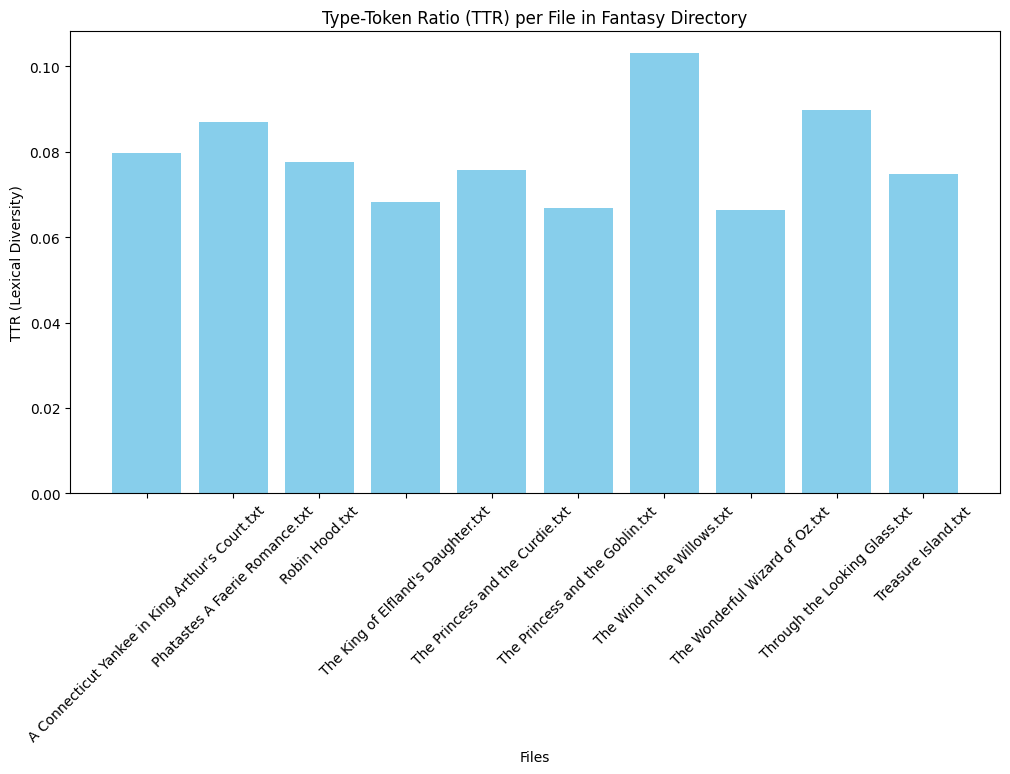

Overall Lexical Diversity for the Directory: 0.031


In [8]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Function to calculate TTR
def calculate_ttr(text):
    tokens = word_tokenize(text)
    types = set(tokens)
    if len(tokens) == 0:
        return 0
    return len(types) / len(tokens)

# Function to plot TTR
def plot_ttr(ttr_values, title):
    filenames, ttr_scores = zip(*ttr_values)
    plt.figure(figsize=(12, 6))
    plt.bar(filenames, ttr_scores, color='skyblue')
    plt.xlabel('Files')
    plt.ylabel('TTR (Lexical Diversity)')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

directory_path = r"C:\Users\hosan\Downloads\Fantasy_TXTS"
overall_tokens = []
overall_types = set()
file_ttr_values = []

for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        with open(os.path.join(directory_path, filename), 'r', encoding='utf-8') as file:
            text = file.read().lower()
            file_ttr = calculate_ttr(text)

            # Collect TTR values for each file
            file_ttr_values.append((filename, file_ttr))

            # For overall TTR calculation
            tokens = word_tokenize(text)
            overall_tokens.extend(tokens)
            overall_types.update(tokens)

# Plot TTR for each file
plot_ttr(file_ttr_values, "Type-Token Ratio (TTR) per File in Fantasy Directory")

# Overall TTR for the directory
overall_ttr = calculate_ttr(' '.join(overall_tokens))
print(f"Overall Lexical Diversity for the Directory: {overall_ttr:.3f}")

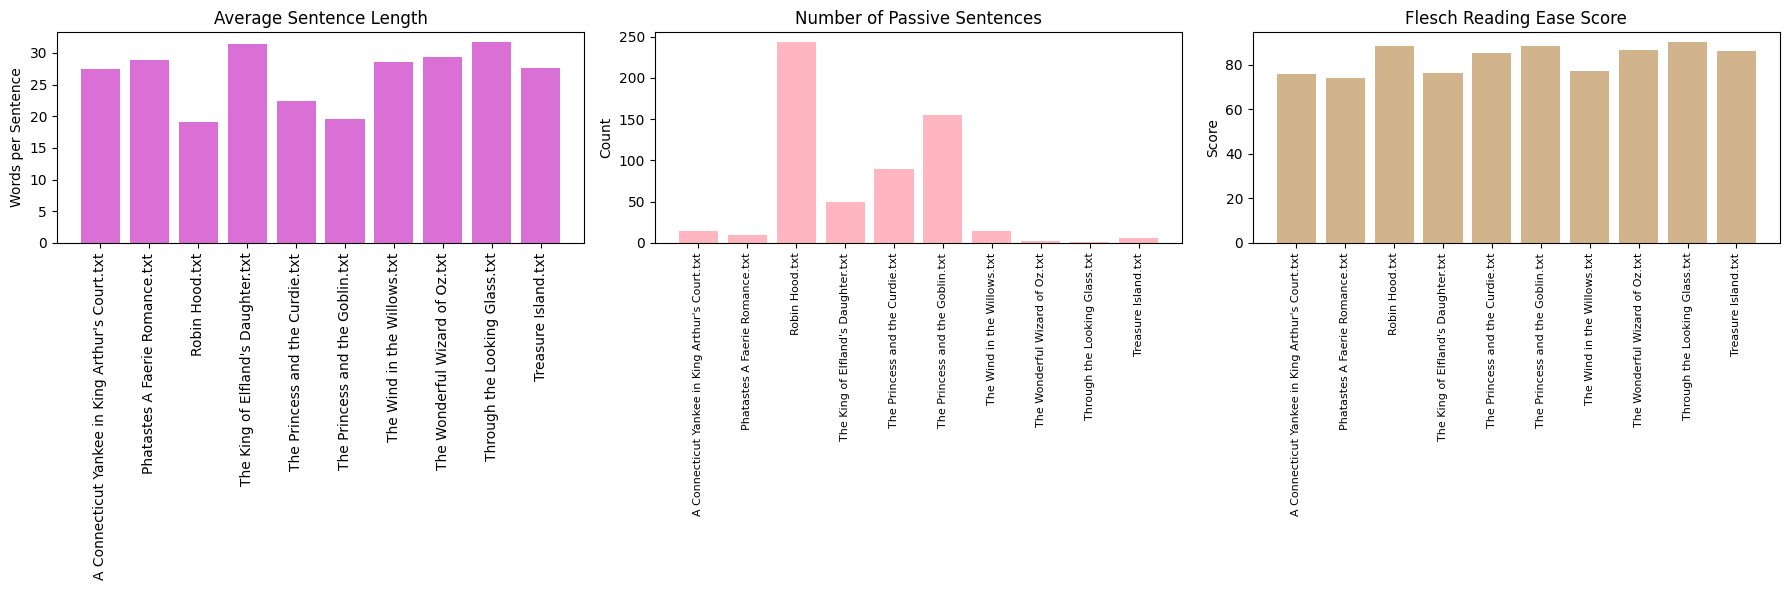

In [9]:
import matplotlib.pyplot as plt
import os
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
import textstat

# Function to analyze the style of text in a file
def analyze_style(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    sentences = sent_tokenize(text)
    if len(sentences) == 0:
        return 0, 0, 0  # Avoid division by zero

    average_sentence_length = sum(len(word_tokenize(sentence)) for sentence in sentences) / len(sentences)
    blob = TextBlob(text)
    passive_sentences = sum(1 for sentence in blob.sentences if sentence.tags and sentence.tags[0][1] in ['VBN', 'VBD'])

    flesch_reading_ease = textstat.flesch_reading_ease(text)

    return average_sentence_length, passive_sentences, flesch_reading_ease

# Analyze and collect data for each file in the directory
directory_path = r'C:\Users\hosan\Downloads\Fantasy_TXTS'
style_data = []

for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)
        avg_sentence_length, passive_sentences, reading_ease = analyze_style(file_path)
        style_data.append((filename, avg_sentence_length, passive_sentences, reading_ease))

# Extracting data for visualization
filenames, avg_lengths, passive_counts, reading_eases = zip(*style_data)

# Visualization
plt.figure(figsize=(18, 6))  # Increase the size of the figure

# Average Sentence Length
plt.subplot(1, 3, 1)
plt.bar(filenames, avg_lengths, color='orchid')
plt.title('Average Sentence Length')
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust font size
plt.ylabel('Words per Sentence')

# Passive Sentences Count
plt.subplot(1, 3, 2)
plt.bar(filenames, passive_counts, color='lightpink')
plt.title('Number of Passive Sentences')
plt.xticks(rotation=90, fontsize=8)  # Rotate and adjust font size
plt.ylabel('Count')

# Flesch Reading Ease Score
plt.subplot(1, 3, 3)
plt.bar(filenames, reading_eases, color='tan')
plt.title('Flesch Reading Ease Score')
plt.xticks(rotation=90, fontsize=8)  # Rotate and adjust font size
plt.ylabel('Score')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [10]:
import spacy
import os
import re

nlp = spacy.load('en_core_web_sm')

def extract_dialogues(text):
    dialogues = re.findall(r'“([^”]+)”', text)
    cleaned_dialogues = [' '.join(dialogue.split()) for dialogue in dialogues]  # Remove extra spaces and newlines
    return cleaned_dialogues

def extract_characters_and_dialogues(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        doc = nlp(text)

    characters = set([ent.text for ent in doc.ents if ent.label_ == "PERSON"])
    dialogues = extract_dialogues(text)

    return characters, dialogues

directory_path = r'C:\Users\hosan\Downloads\Fantasy_TXTS'
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)
        characters, dialogues = extract_characters_and_dialogues(file_path)
        
        print(f"File: {filename}")
        print("Characters:", characters)
        print("Sample Dialogues:", dialogues[:5])  # Display first 5 dialogues

File: A Connecticut Yankee in King Arthur's Court.txt
Characters: {'peril--', 'Madok de la Montaine', 'Benvenuto Cellini', 'Phyllis', 'Marcos', 'Mar--', 'matinee', 'Perimones', 'Down', 'thou knewest', 'Hosannah', 'Breuse Sance Pite', 'Marhaus', "Louis XV's", 'Bors de Ganis', 'Grummore Grummorsum', 'Bzz', 'England', 'Arthur King', 'Lactantius', 'Smart', 'Joseph', 'Launcelot', 'tarry', "Queen Guenever's", 'Horatius', 'Morte', 'Sacred Raggedness', 'Driant', 'Pertolope', 'Astolat', "King Arthur's", 'du\nseigneur', 'Liver Lane', 'Lo', 'Jones', 'Lamorak', 'Pertipole', 'Field Marshal', 'Jump', 'Meliagraunce', 'satin cap', 'Knight', 'Matinee', 'Haskins', 'Belias le Orgulous', 'Lucan', 'Sandy\n--stay', 'Bedivere', 'Kay', 'Gawaine', 'George', 'Gaul', 'Charolais of Gaul', 'Robinson', 'showy', 'Marry', 'Sandy', 'Ozana', 'Mumble', 'ENGLAND!--_is', 'King Arthur', 'Brer Merlin', 'Flanagan', 'payeth', 'Georges', 'Smug', 'Percivale de Galis', 'Gaheris', 'Ulfius', 'Marinel', 'Persant', 'Shall', 'Bleobar

In [11]:
import spacy
import os
from collections import defaultdict

nlp = spacy.load('en_core_web_sm')

def extract_interactions(text):
    doc = nlp(text)
    interactions = defaultdict(int)

    for sent in doc.sents:
        characters = set([ent.text for ent in sent.ents if ent.label_ == "PERSON"])
        for char1 in characters:
            for char2 in characters:
                if char1 != char2:
                    interactions[(char1, char2)] += 1

    return interactions

directory_path = r'C:\Users\hosan\Downloads\Fantasy_TXTS'

for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            interactions = extract_interactions(text)

            print(f"Interactions in {filename}:")
            for pair, count in interactions.items():
                print(f"{pair}: {count}")
            print("\n")  # Adds a newline for better readability between files

Interactions in A Connecticut Yankee in King Arthur's Court.txt:
('Bors de Ganis', 'Bedivere'): 1
('Bors de Ganis', 'Launcelot'): 1
('Bors de Ganis', 'Galahad'): 1
('Bedivere', 'Bors de Ganis'): 1
('Bedivere', 'Launcelot'): 1
('Bedivere', 'Galahad'): 1
('Launcelot', 'Bors de Ganis'): 1
('Launcelot', 'Bedivere'): 1
('Launcelot', 'Galahad'): 3
('Galahad', 'Bors de Ganis'): 1
('Galahad', 'Bedivere'): 1
('Galahad', 'Launcelot'): 3
('King Arthur', 'Sagramor'): 1
('Sagramor', 'King Arthur'): 1
('Kay', 'Launcelot'): 7
('Launcelot', 'Kay'): 7
('King Arthur', 'Kay'): 2
('King Arthur', 'Launcelot'): 1
('King Arthur', 'Queen Guenever'): 1
('Kay', 'King Arthur'): 2
('Kay', 'Queen Guenever'): 1
('Launcelot', 'King Arthur'): 1
('Launcelot', 'Queen Guenever'): 1
('Queen Guenever', 'King Arthur'): 1
('Queen Guenever', 'Kay'): 1
('Queen Guenever', 'Launcelot'): 1
('Kay the Seneschal', 'Arthur'): 1
('Kay the Seneschal', "Queen Guenever's"): 1
('Kay the Seneschal', 'Kay'): 1
('Kay the Seneschal', 'Launce

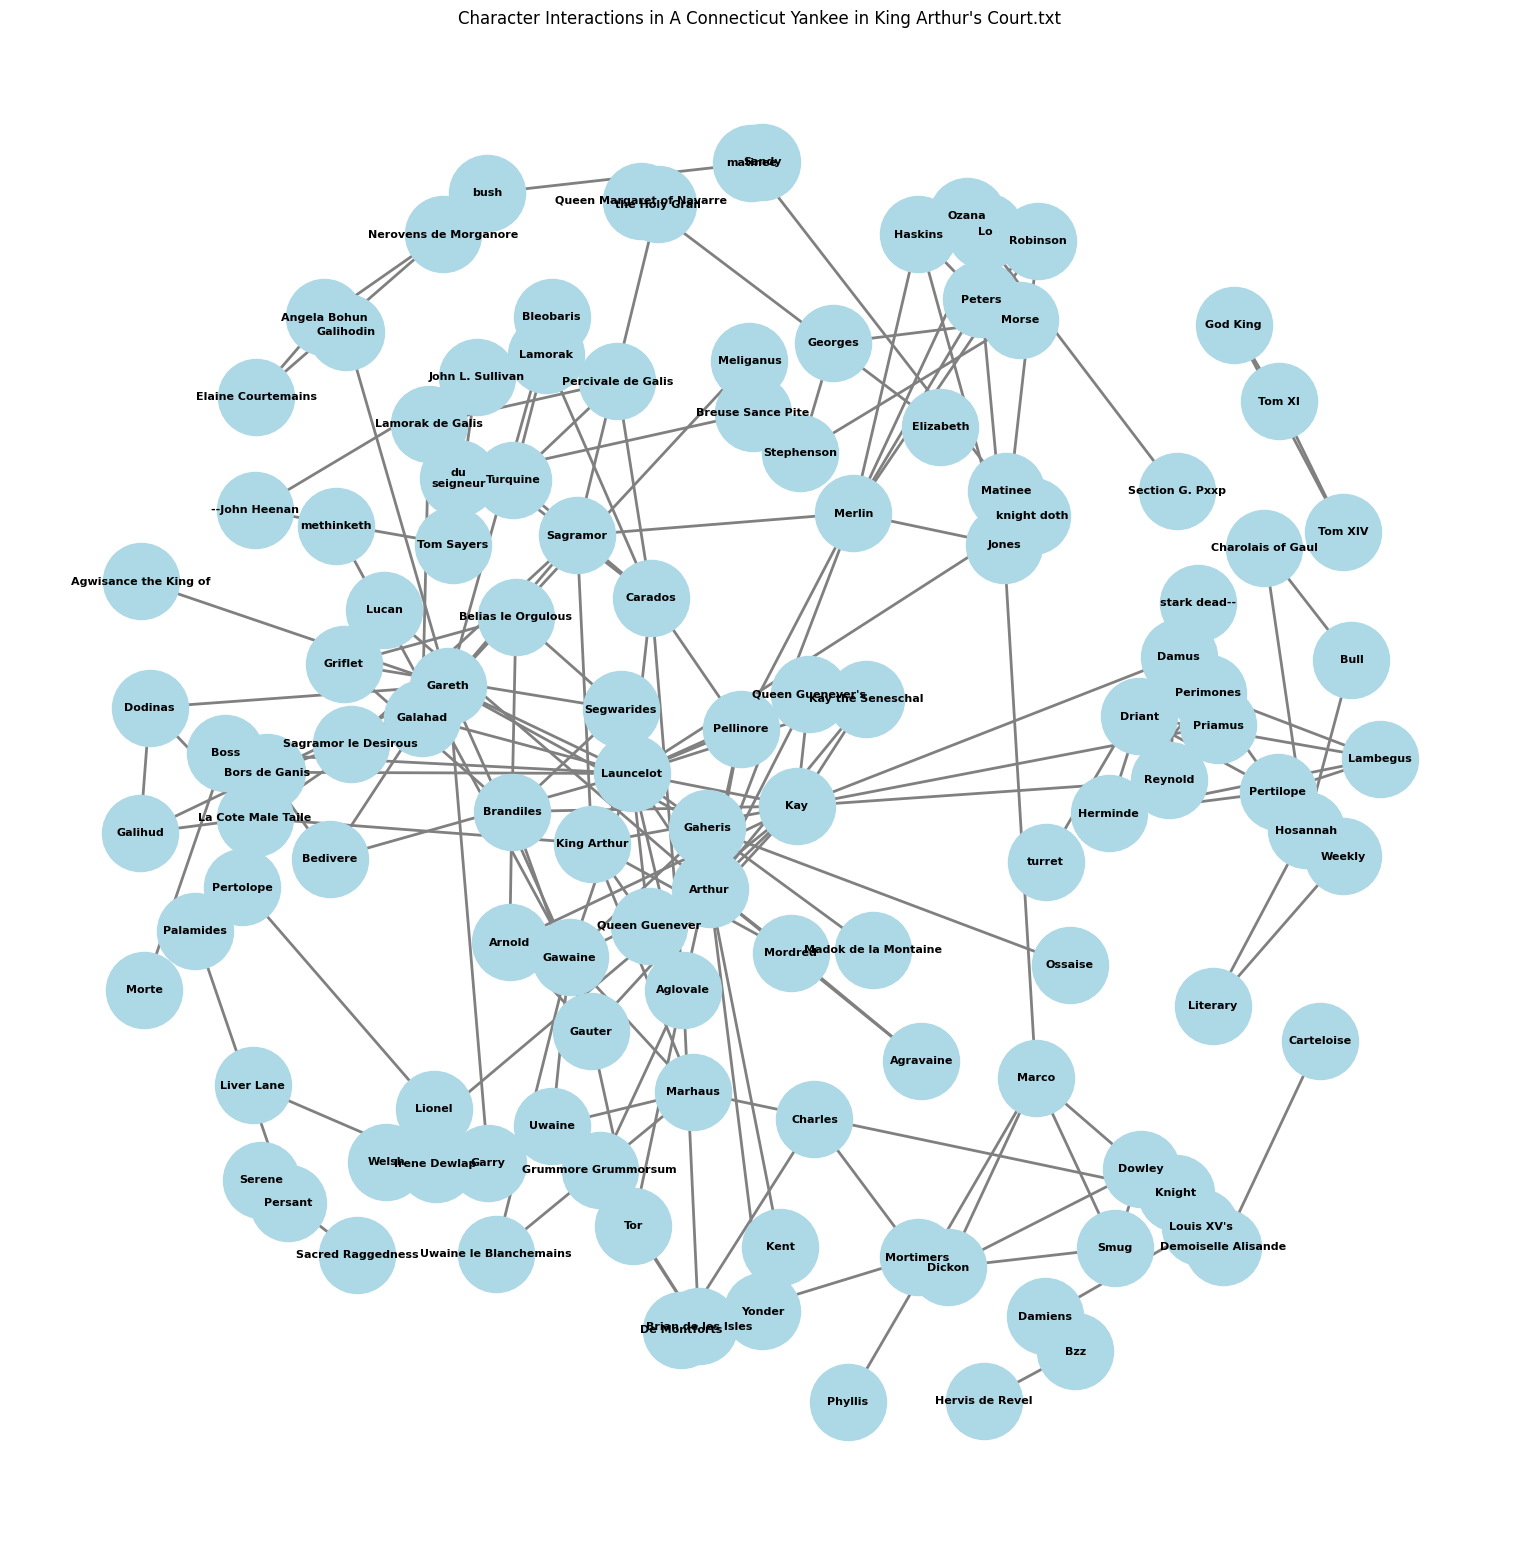

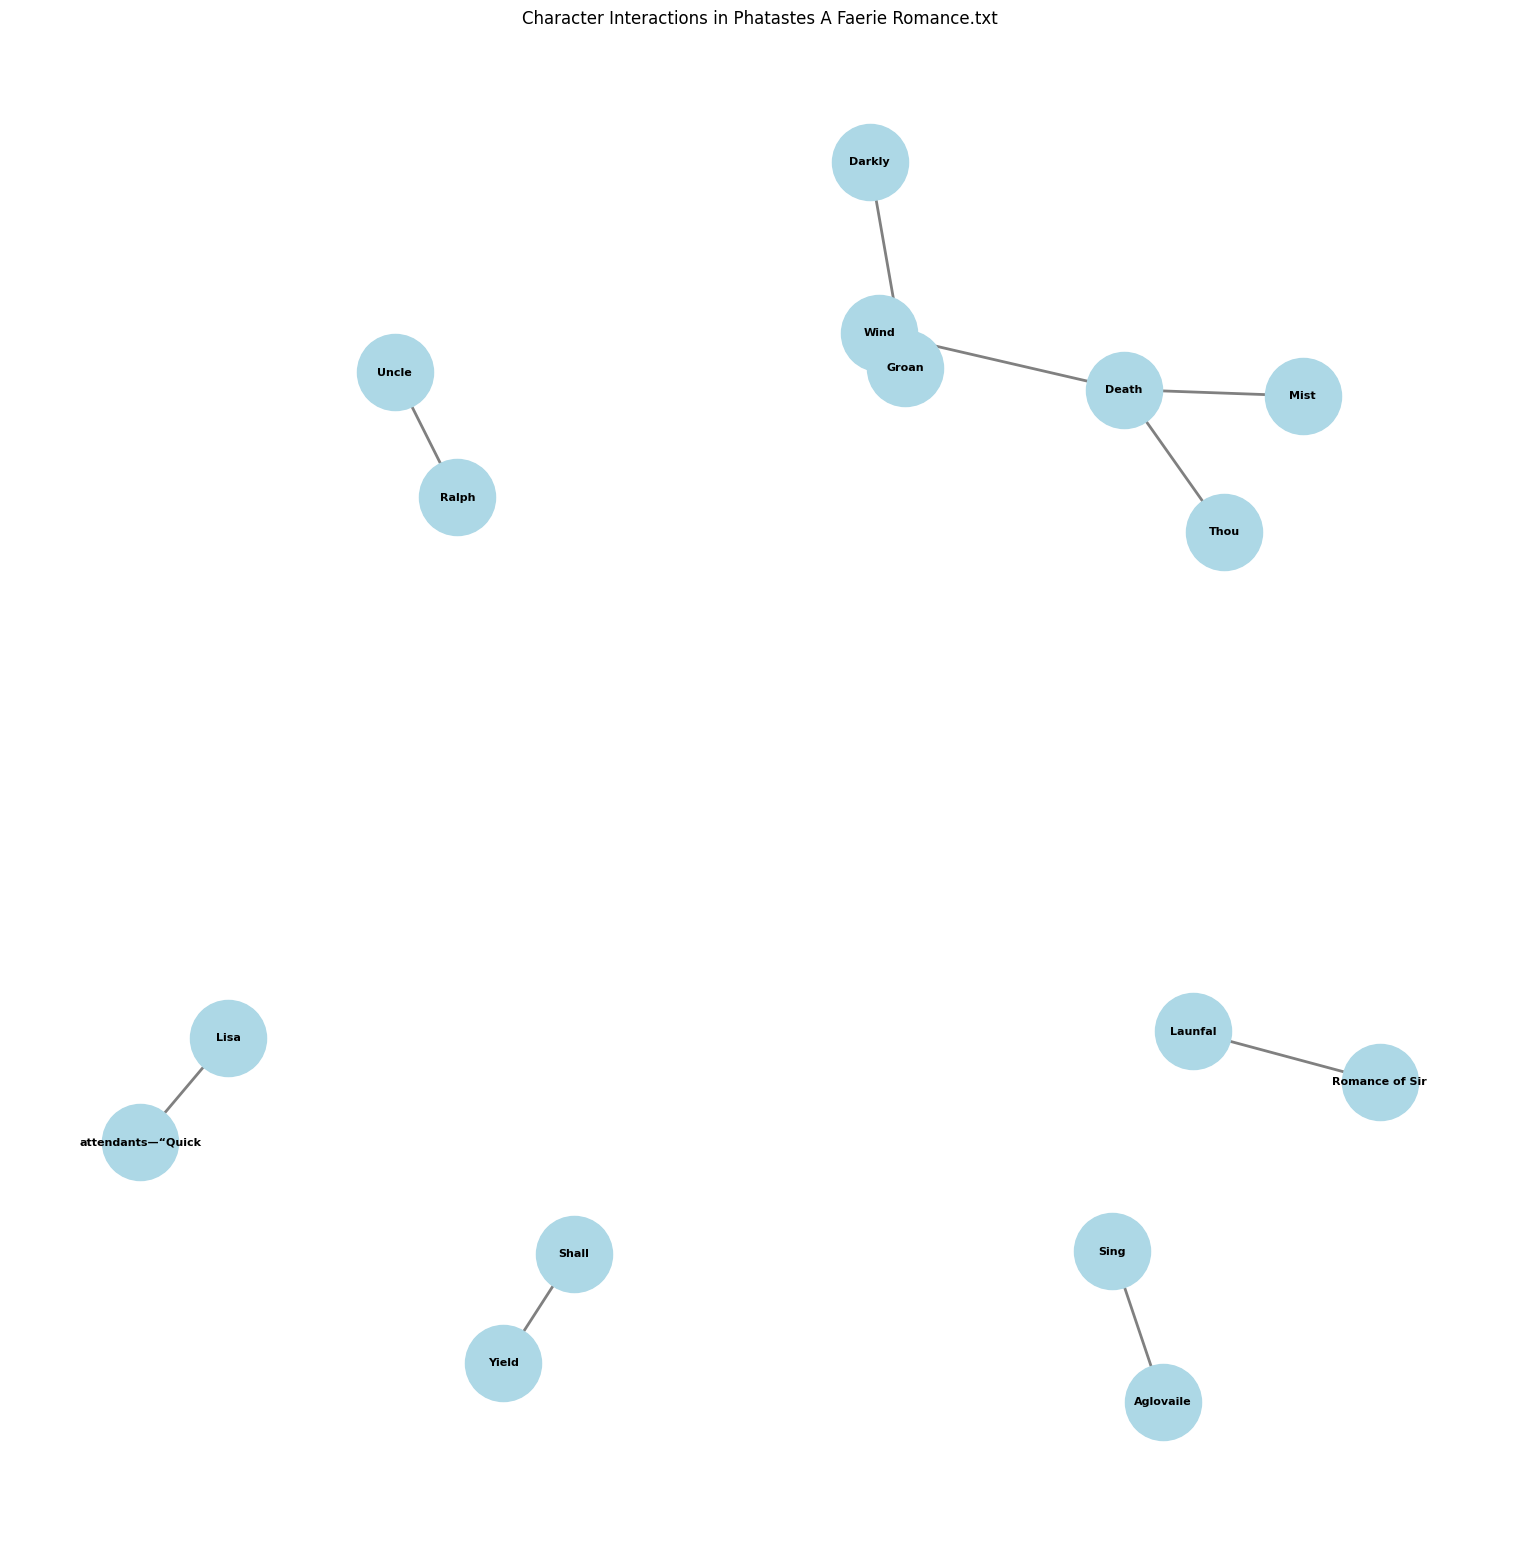

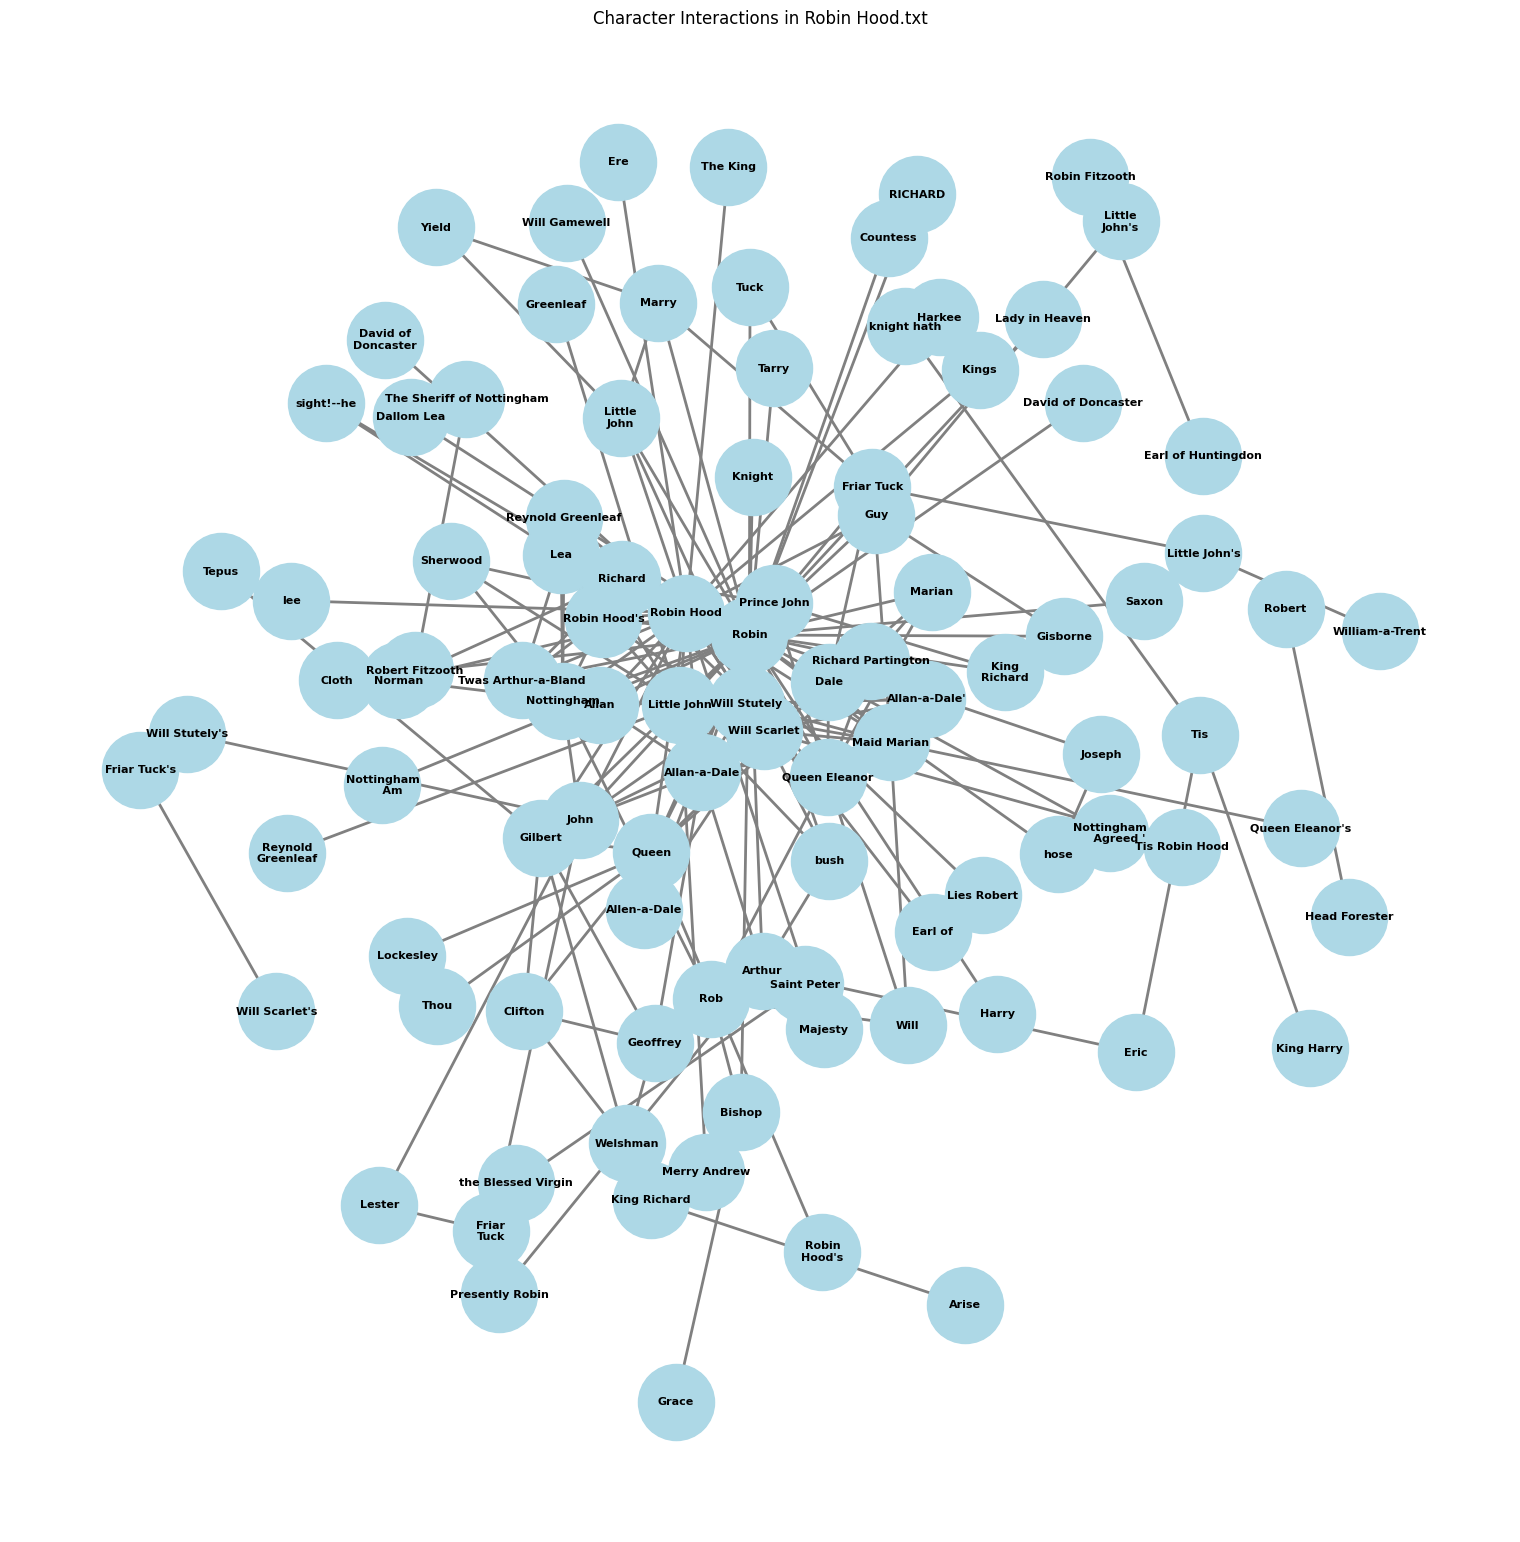

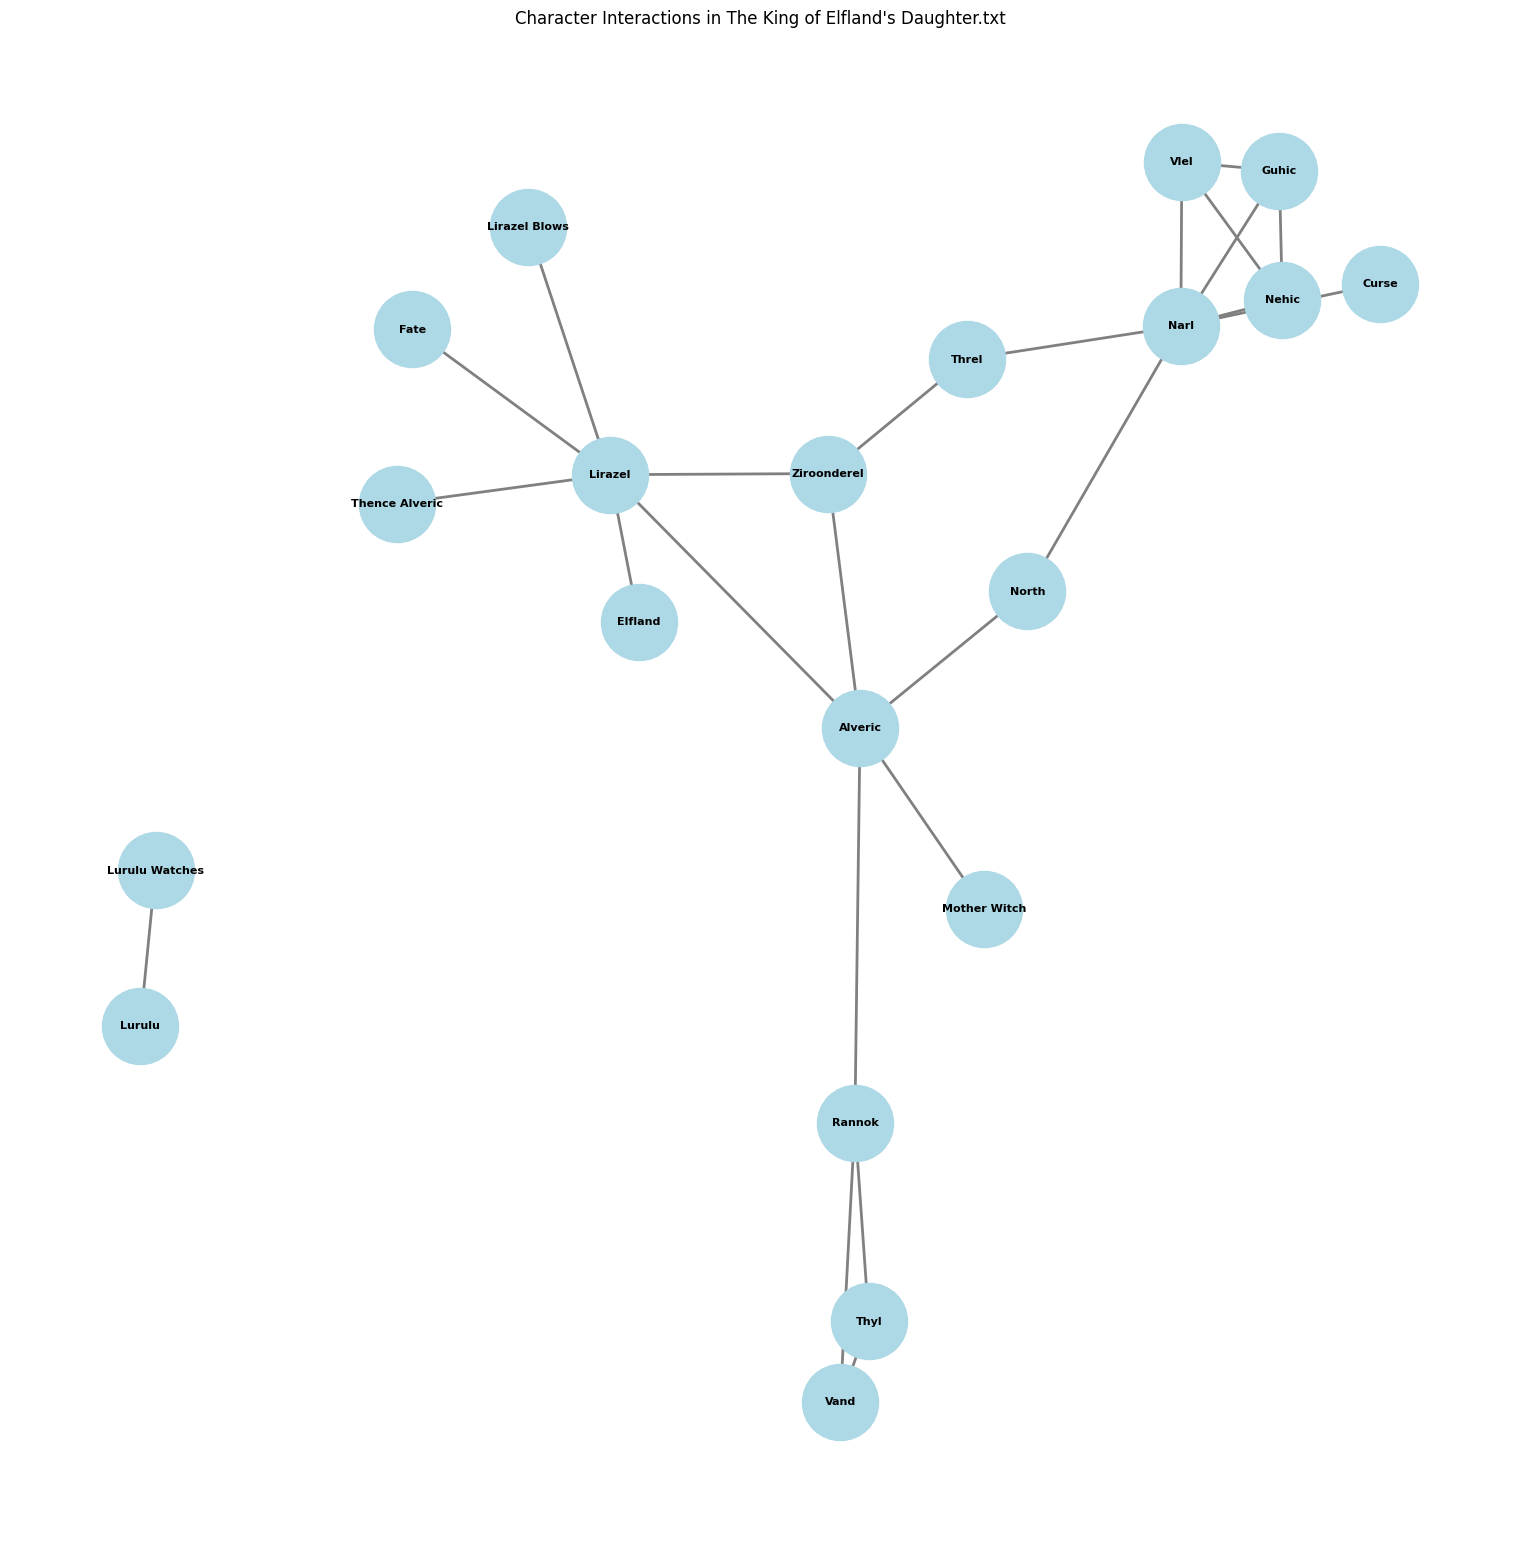

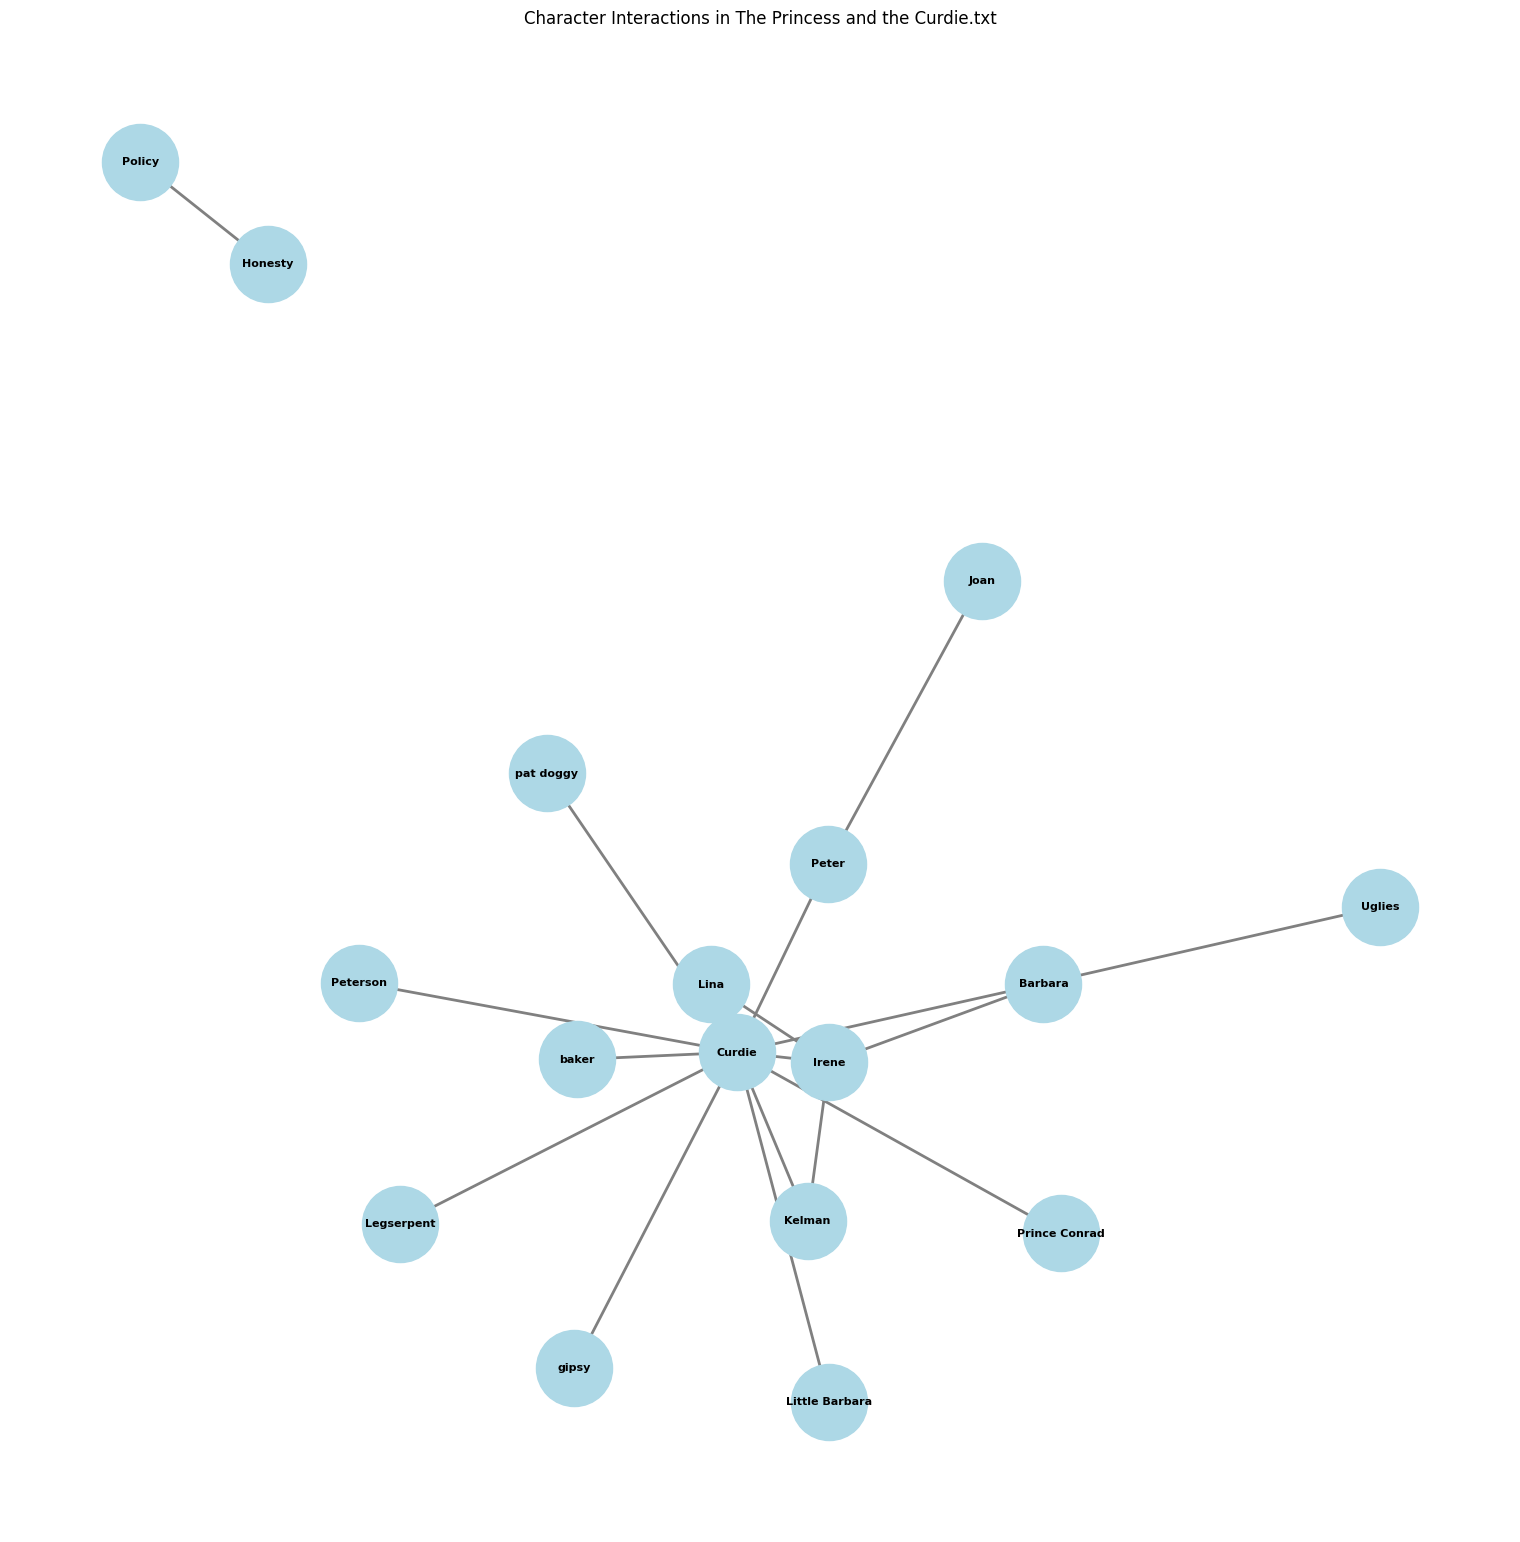

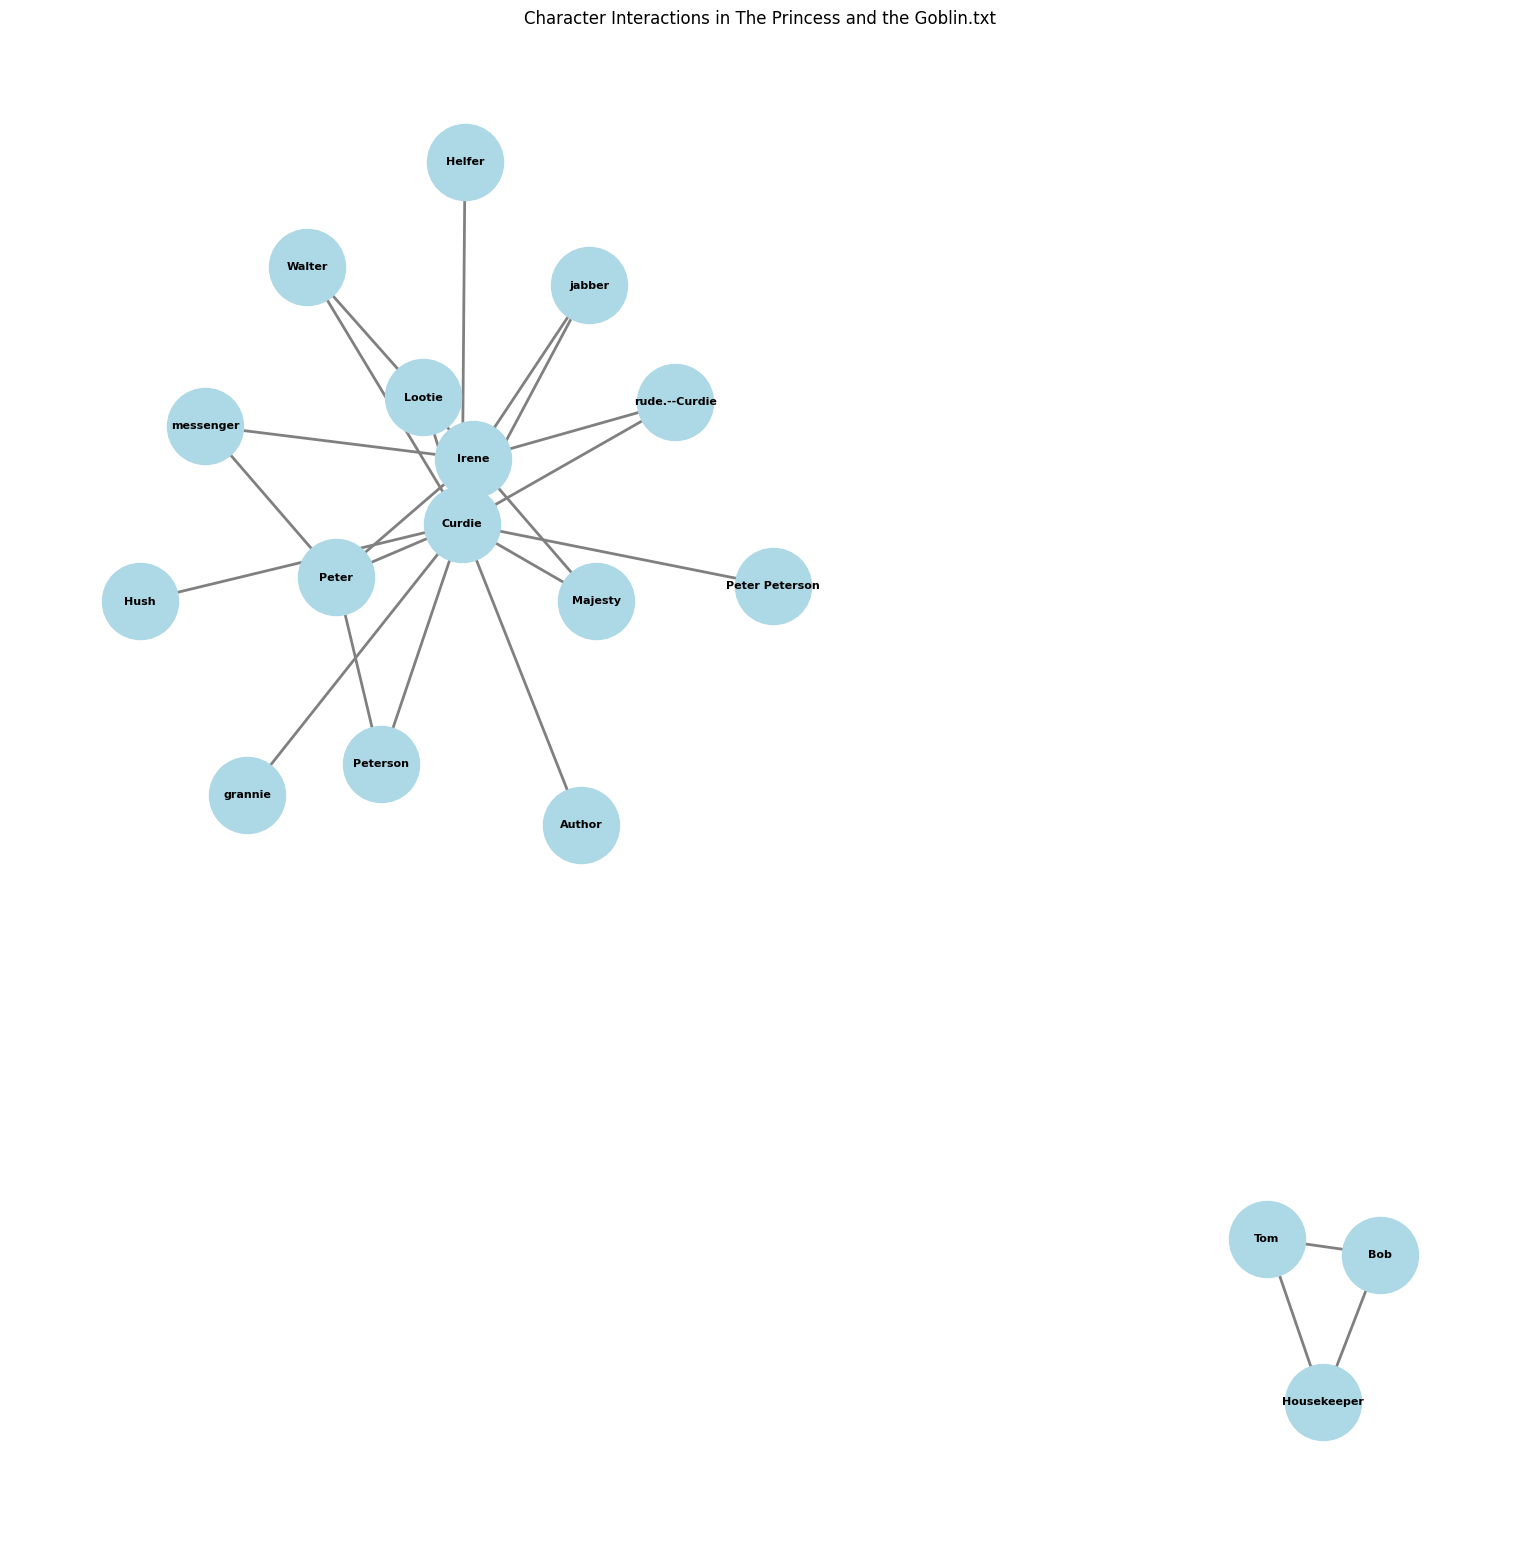

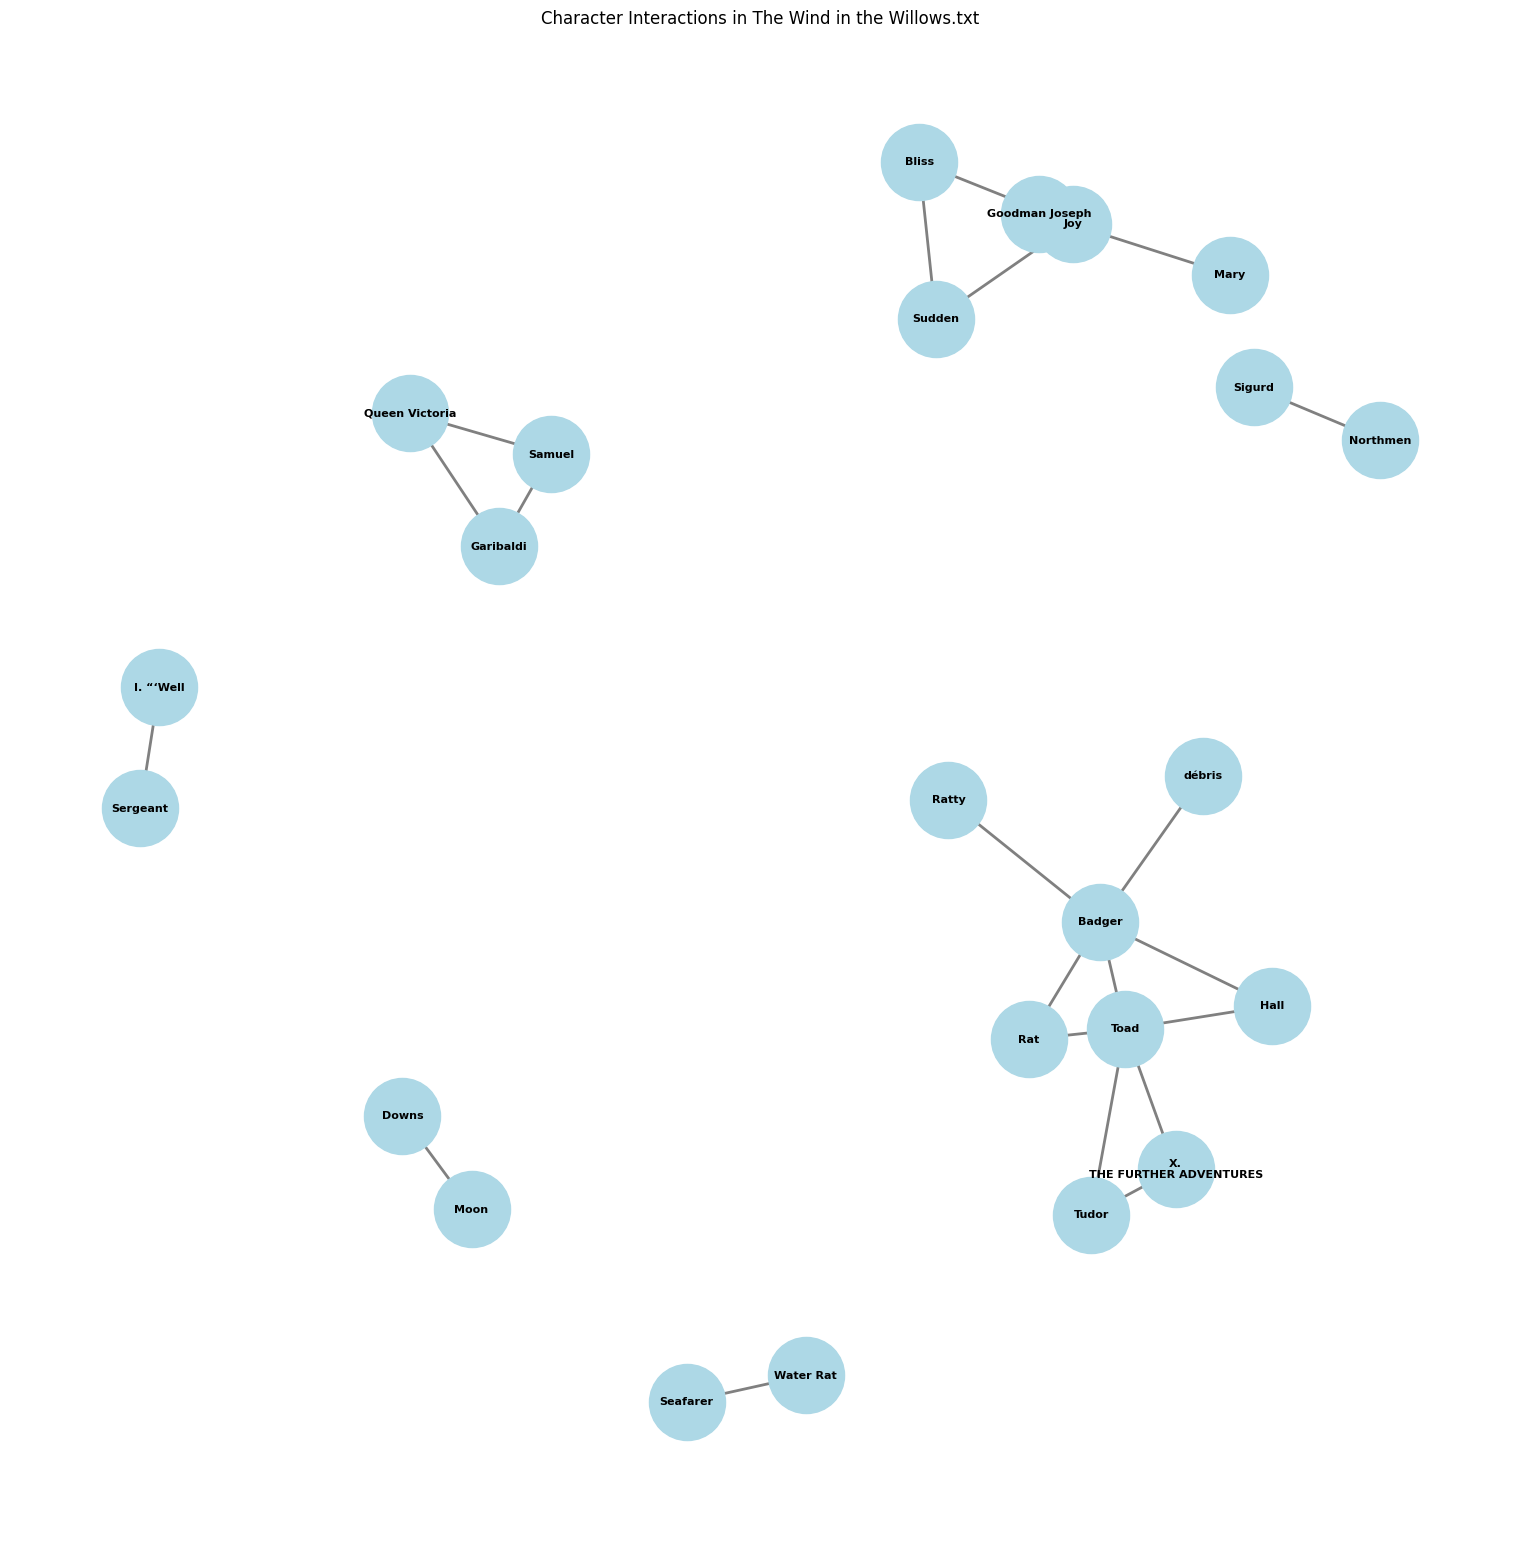

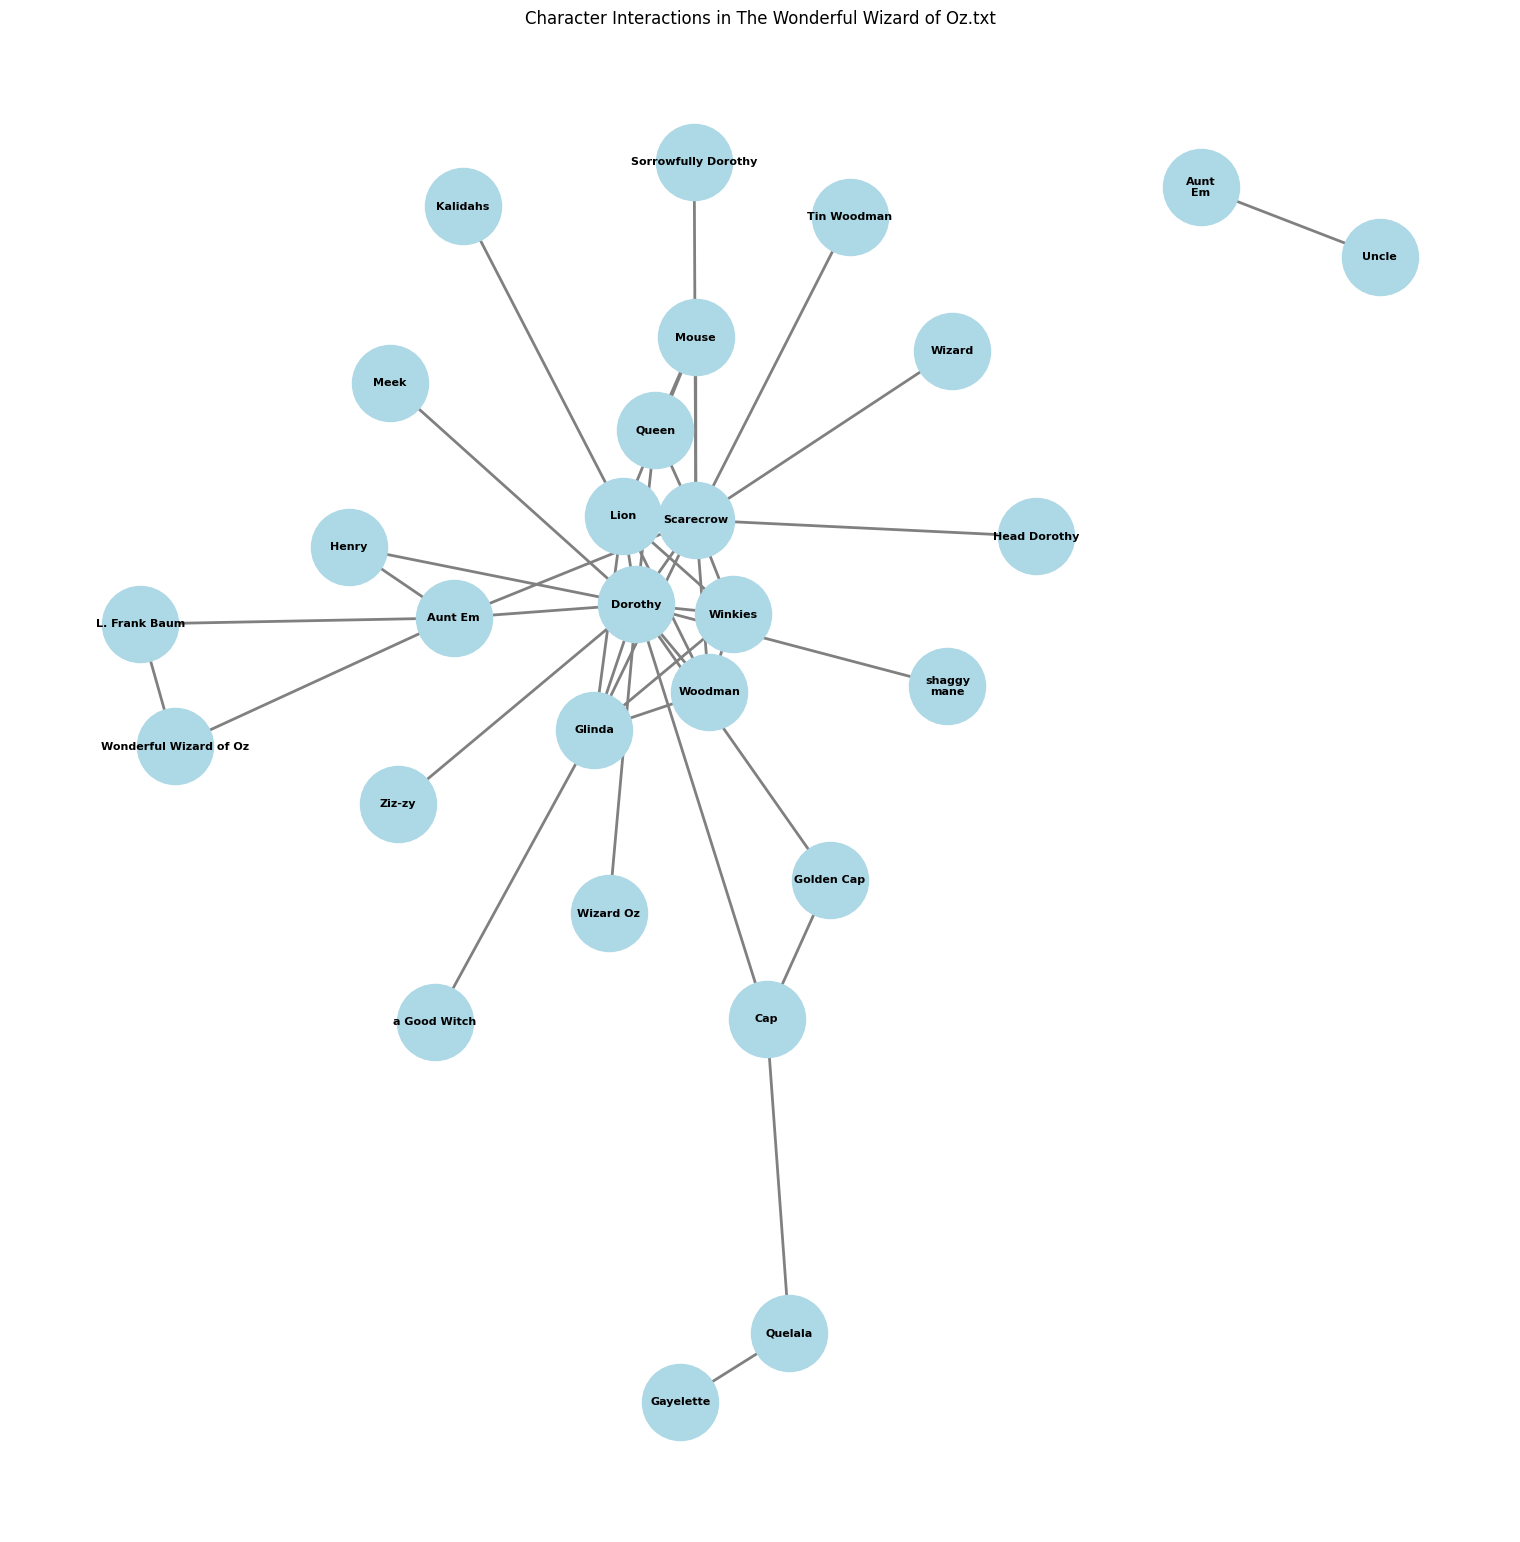

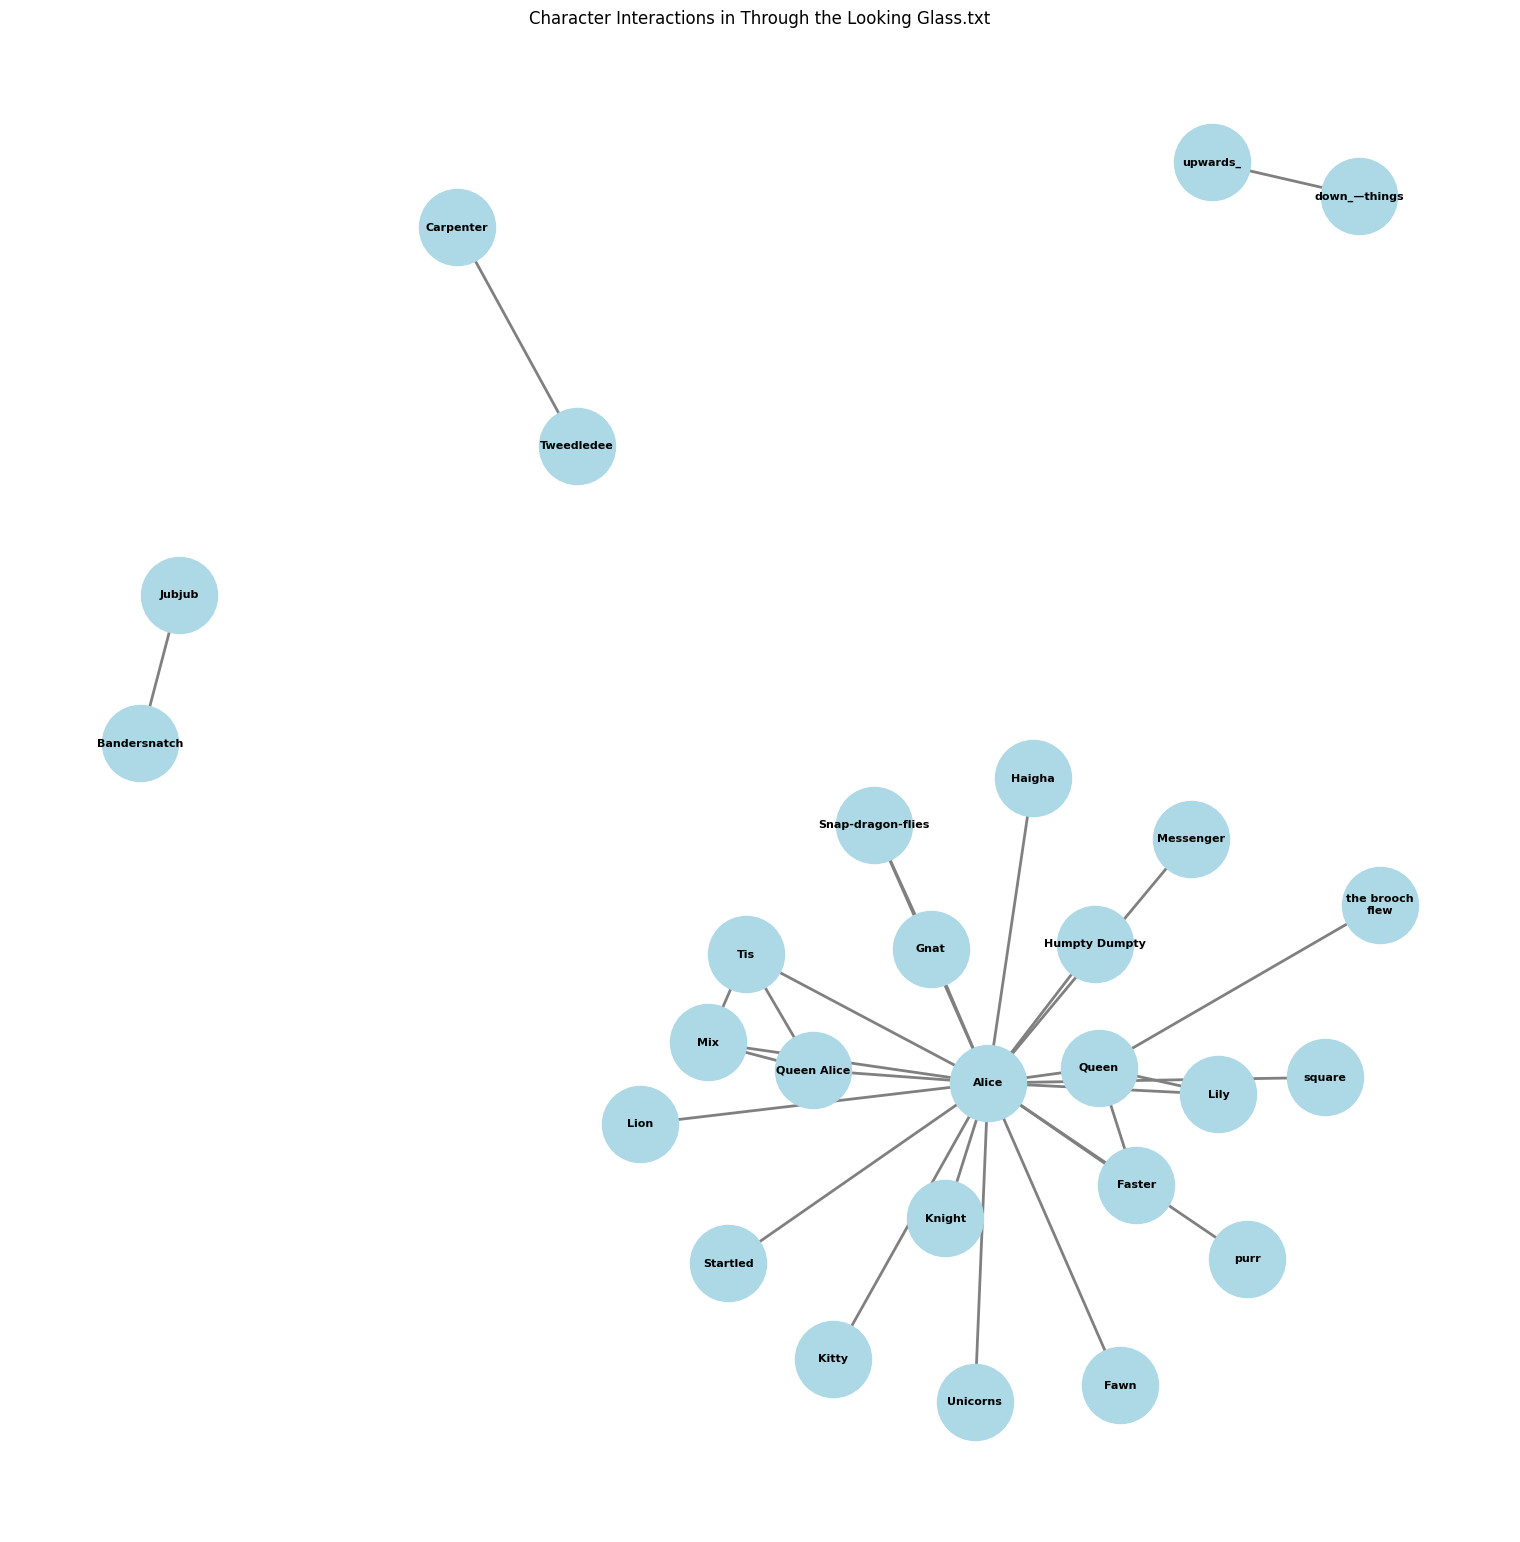

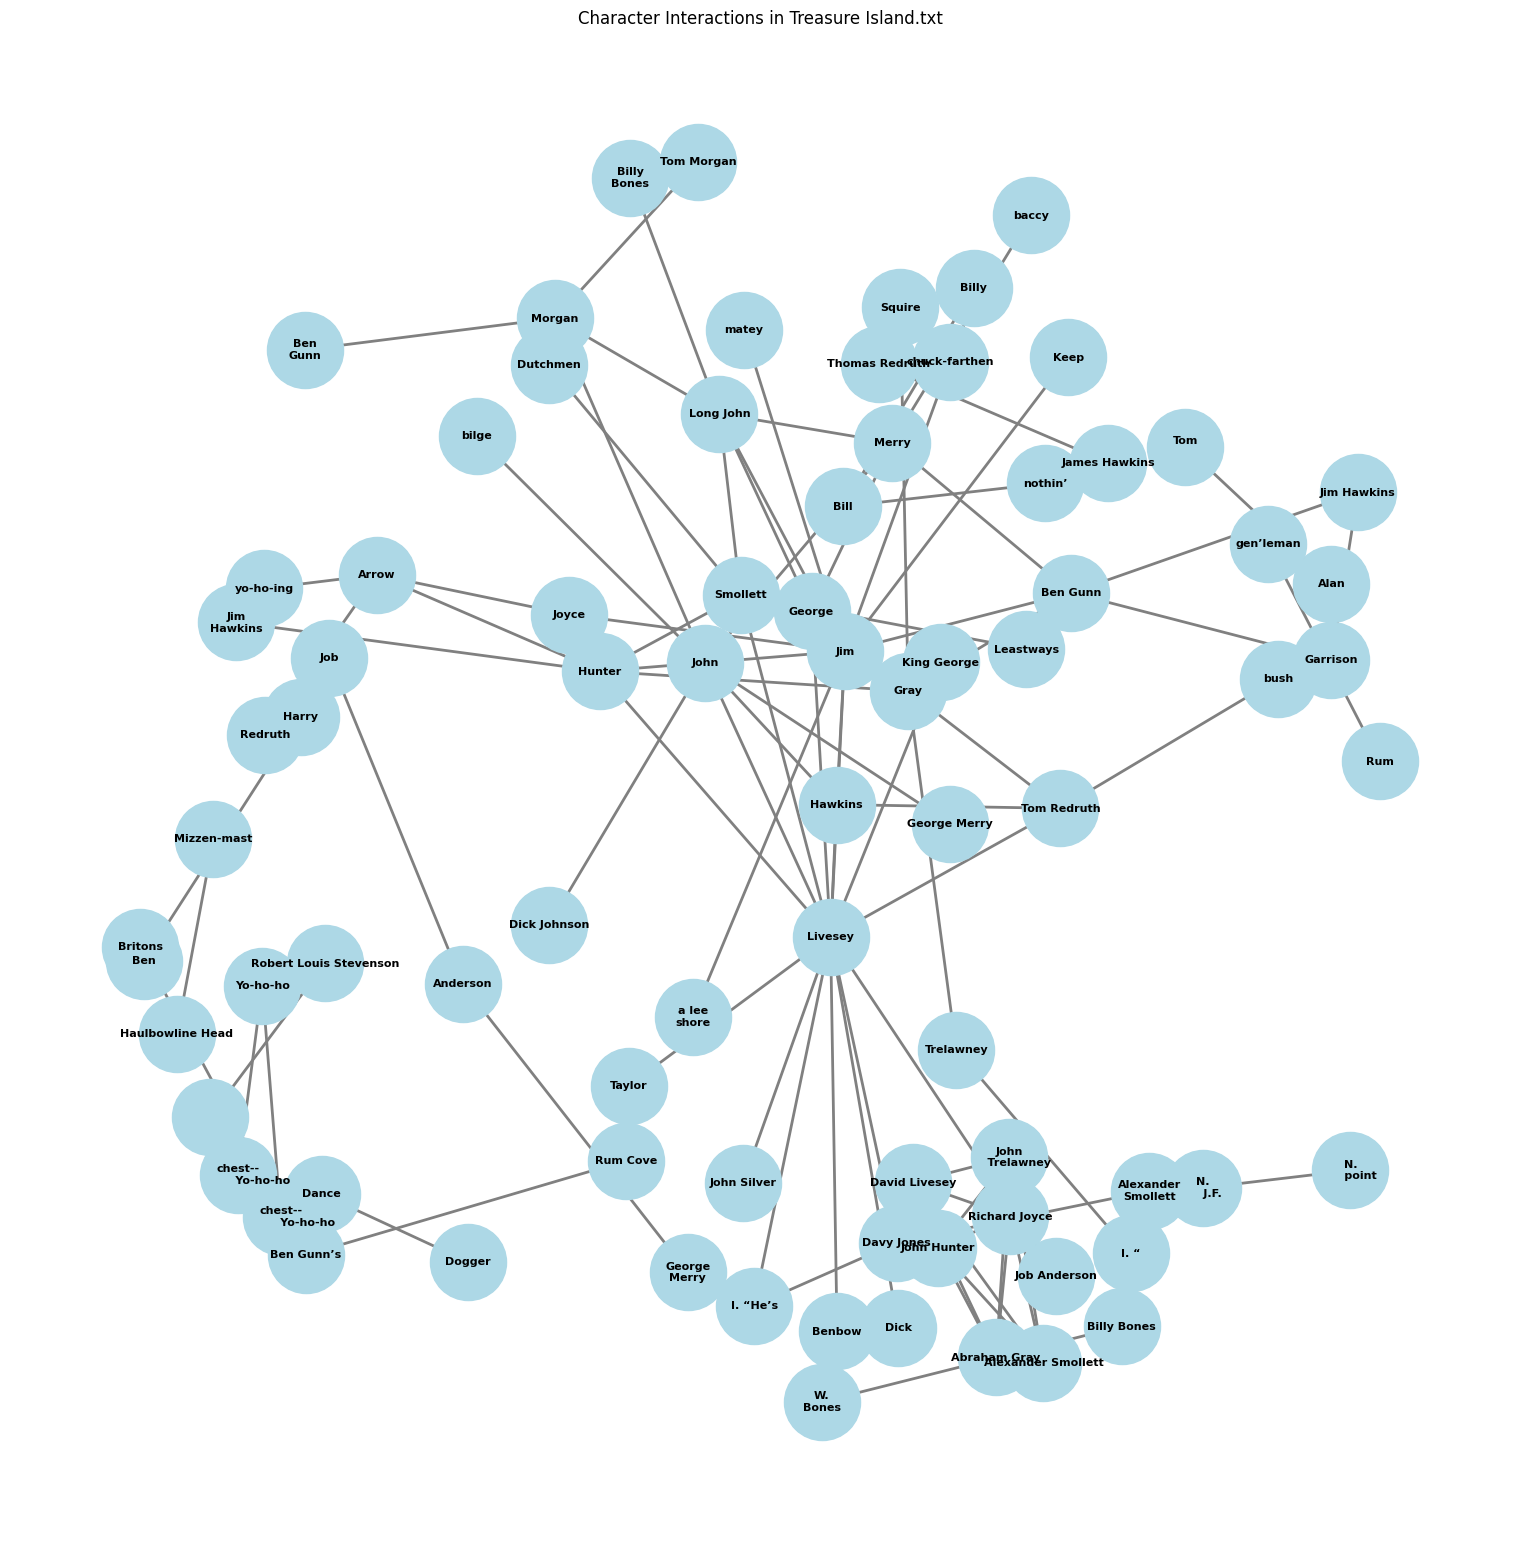

In [12]:
import spacy
import os
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

nlp = spacy.load('en_core_web_sm')

def extract_interactions(text):
    doc = nlp(text)
    interactions = defaultdict(int)

    for sent in doc.sents:
        characters = set([ent.text for ent in sent.ents if ent.label_ == "PERSON"])
        for char1 in characters:
            for char2 in characters:
                if char1 != char2:
                    interactions[(char1, char2)] += 1

    return interactions

def plot_network(interactions, title):
    G = nx.Graph()

    # Add edges with weights
    for (char1, char2), count in interactions.items():
        G.add_edge(char1, char2, weight=count)

    # Define node positions using a layout
    pos = nx.spring_layout(G, k=0.5, iterations=50)  # Adjust layout parameters

    plt.figure(figsize=(15, 15))  # Increase figure size
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue",
            font_size=8, font_weight="bold", edge_color="gray", width=2)
    plt.title(title)
    plt.axis('off')  # Turn off the axis
    plt.show()

directory_path = r'C:\Users\hosan\Downloads\Fantasy_TXTS'

for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            interactions = extract_interactions(text)

            # Visualize the network of interactions for each file
            plot_title = f"Character Interactions in {filename}"
            plot_network(interactions, plot_title)

In [13]:
import os
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import string

def process_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    tokens = word_tokenize(text.lower())
    stopped_tokens = [word for word in tokens if word not in stopwords.words('english')]
    return stopped_tokens

# Read and process all text files
texts = []
directory_path = r'C:\Users\hosan\Downloads\Fantasy_TXTS'
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        with open(os.path.join(directory_path, filename), 'r', encoding='utf-8') as file:
            texts.append(process_text(file.read()))

# Create a dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Perform LDA
lda_model = models.LdaMulticore(corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

Topic: 0 
Words: 0.009*"said" + 0.008*"”" + 0.007*"one" + 0.007*"“" + 0.006*"’" + 0.006*"came" + 0.006*"would" + 0.005*"elfland" + 0.004*"went" + 0.004*"could"

Topic: 1 
Words: 0.018*"“" + 0.017*"”" + 0.012*"’" + 0.009*"said" + 0.005*"one" + 0.005*"could" + 0.004*"like" + 0.004*"would" + 0.003*"time" + 0.003*"little"

Topic: 2 
Words: 0.021*"’" + 0.020*"“" + 0.019*"”" + 0.009*"said" + 0.006*"one" + 0.005*"would" + 0.004*"could" + 0.004*"man" + 0.004*"upon" + 0.004*"like"

Topic: 3 
Words: 0.031*"“" + 0.030*"”" + 0.019*"’" + 0.010*"said" + 0.007*"one" + 0.006*"would" + 0.006*"could" + 0.004*"little" + 0.004*"like" + 0.004*"see"

Topic: 4 
Words: 0.011*"said" + 0.010*"“" + 0.010*"”" + 0.007*"one" + 0.007*"would" + 0.006*"robin" + 0.005*"little" + 0.005*"could" + 0.005*"upon" + 0.005*"came"



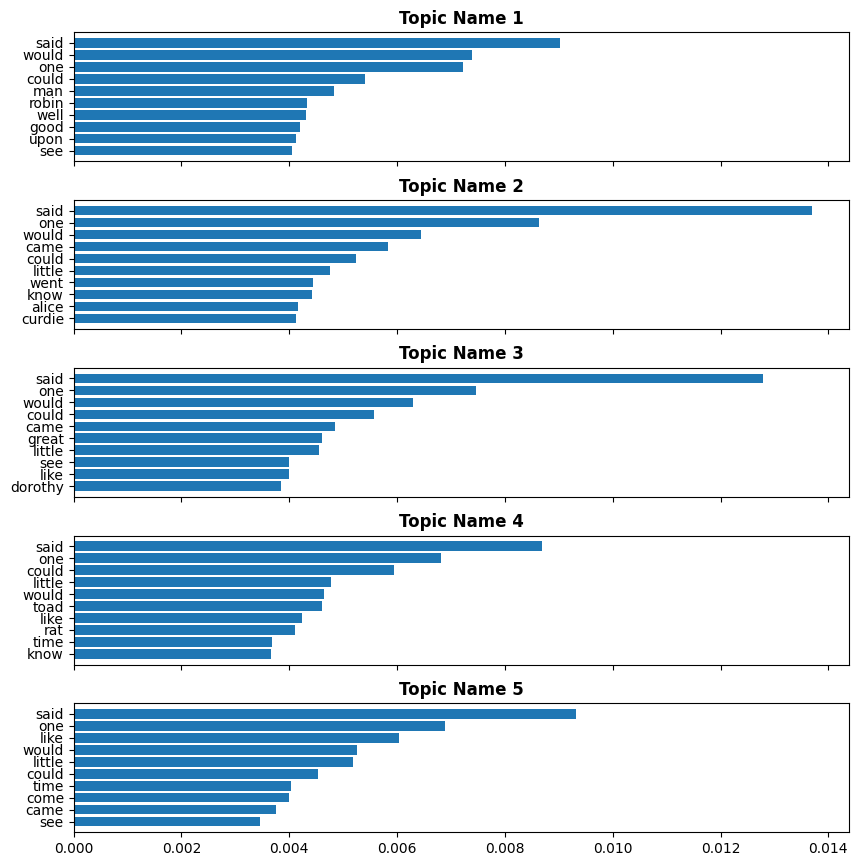

In [14]:
import os
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import string
import matplotlib.pyplot as plt


def process_text(text):
    # Remove punctuation, quotations, and apostrophes
    text = text.translate(str.maketrans('', '', string.punctuation + "‘’“”"))
    
    tokens = word_tokenize(text.lower())
    stopped_tokens = [word for word in tokens if word not in stopwords.words('english')]
    return stopped_tokens

# Read and process all text files
texts = []
directory_path = r'C:\Users\hosan\Downloads\Fantasy_TXTS'
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        with open(os.path.join(directory_path, filename), 'r', encoding='utf-8') as file:
            texts.append(process_text(file.read()))

# Create a dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Perform LDA
lda_model = models.LdaMulticore(corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)

# Define topic names based on interpretation of the top words
topic_names = {
    0: "Topic Name 1",
    1: "Topic Name 2",
    2: "Topic Name 3",
    3: "Topic Name 4",
    4: "Topic Name 5"
}

# Plotting the top words in each topic with topic names
num_words = 10
fig, axes = plt.subplots(5, 1, figsize=(10, 10), sharex=True)
axes = axes.flatten()

for i in range(5):
    topic = lda_model.show_topic(i, num_words)
    words, weights = zip(*topic)
    ax = axes[i]
    ax.barh(words, weights)
    ax.set_title(f'{topic_names[i]}', fontweight='bold')
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.subplots_adjust(top=0.9, bottom=0.1, hspace=0.3)
plt.show()